In [240]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle 
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import r2_score
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import Lars, Ridge, Lasso, ElasticNet, BayesianRidge

## Analisis de Datos

### Lectura de Datos

In [241]:
df = pd.read_csv('datos/train_PAY_AMT1.csv', sep = '|' )

In [242]:
pd.set_option('display.max_columns',None)
df

CUSTOMER_ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_2  PAY_3  \
0           20558    80000.0    2          3         2   28      0      0   
1            5767   280000.0    2          2         1   37      0      0   
2             664   140000.0    2          3         2   59      2      0   
3           17845   160000.0    1          2         1   52     -1      2   
4            7324    90000.0    2          2         2   23      0      0   
...           ...        ...  ...        ...       ...  ...    ...    ...   
5620        13139    80000.0    1          3         1   49      0      0   
5621        22206    80000.0    1          3         1   42     -2     -2   
5622        19489   340000.0    2          2         1   36      0      0   
5623        27693    20000.0    2          2         1   43      0      0   
5624        29276    70000.0    1          1         2   29      2      0   

      PAY_4  PAY_5  PAY_6  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  \
0         0      0      0    77450.0    78100.0    76204.0    66876.0   
1         0      0      0    29078.0    30144.0    32629.0    35126.0   
2         0      0      0    63654.0    62042.0    63445.0    63729.0   
3        -1      2     -1      390.0      780.0      390.0     1080.0   
4         0      0      0    13107.0    13740.0    14770.0    13306.0   
...     ...    ...    ...        ...        ...        ...        ...   
5620      0     -2     -2    77985.0    80886.0    82150.0        0.0   
5621     -2     -2     -2    -1590.0    -6256.0   -10922.0   -15588.0   
5622      0      0      0     3058.0     4087.0     5129.0     3142.0   
5623      0      0      0     6459.0     7470.0     8492.0     9547.0   
5624      0      0      0    71267.0    67401.0    63239.0    23163.0   

      BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  \
0       66182.0    67199.0    3500.0    2600.0    2400.0    2500.0    2700.0   
1       35759.0    42317.0    1515.0    3000.0    3000.0    1292.0    7147.0   
2       63751.0    65421.0       0.0    3000.0    2000.0    2000.0    2000.0   
3         540.0      390.0     780.0       0.0    1080.0       0.0     390.0   
4       10465.0     9704.0    1251.0    1281.0    1173.0     500.0    1000.0   
...         ...        ...       ...       ...       ...       ...       ...   
5620        0.0        0.0    4200.0    3800.0       0.0       0.0       0.0   
5621   -20254.0   -24920.0    4666.0    4666.0    4666.0    4666.0     266.0   
5622     3210.0     4153.0    1087.0    1129.0    1052.0     120.0    1000.0   
5623    20766.0    12197.0    1123.0    1145.0    1200.0    2000.0    3000.0   
5624    41106.0    42021.0       5.0    2910.0    1000.0   20000.0    1600.0   

      PAY_AMT6  
0       2300.0  
1       1415.0  
2       3000.0  
3        390.0  
4       1000.0  
...        ...  
5620       0.0  
5621       0.0  
5622    1000.0  
5623    1000.0  
5624    2000.0  

[5625 rows x 23 columns]

In [243]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5625 entries, 0 to 5624
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CUSTOMER_ID  5625 non-null   int64  
 1   LIMIT_BAL    5625 non-null   float64
 2   SEX          5625 non-null   int64  
 3   EDUCATION    5625 non-null   int64  
 4   MARRIAGE     5625 non-null   int64  
 5   AGE          5625 non-null   int64  
 6   PAY_2        5625 non-null   int64  
 7   PAY_3        5625 non-null   int64  
 8   PAY_4        5625 non-null   int64  
 9   PAY_5        5625 non-null   int64  
 10  PAY_6        5625 non-null   int64  
 11  BILL_AMT1    5625 non-null   float64
 12  BILL_AMT2    5625 non-null   float64
 13  BILL_AMT3    5625 non-null   float64
 14  BILL_AMT4    5625 non-null   float64
 15  BILL_AMT5    5625 non-null   float64
 16  BILL_AMT6    5625 non-null   float64
 17  PAY_AMT1     5625 non-null   float64
 18  PAY_AMT2     5625 non-null   float64
 19  PAY_AM

In [244]:
df.describe()

CUSTOMER_ID      LIMIT_BAL          SEX    EDUCATION     MARRIAGE  \
count   5625.000000    5625.000000  5625.000000  5625.000000  5625.000000   
mean   14881.272000  170283.733333     1.609244     1.858844     1.547022   
std     8655.054802  131513.486564     0.487963     0.788872     0.523252   
min        1.000000   10000.000000     1.000000     0.000000     0.000000   
25%     7358.000000   60000.000000     1.000000     1.000000     1.000000   
50%    14903.000000  140000.000000     2.000000     2.000000     2.000000   
75%    22352.000000  240000.000000     2.000000     2.000000     2.000000   
max    29997.000000  800000.000000     2.000000     6.000000     3.000000   

               AGE        PAY_2        PAY_3        PAY_4        PAY_5  \
count  5625.000000  5625.000000  5625.000000  5625.000000  5625.000000   
mean     35.480178    -0.150222    -0.184889    -0.240000    -0.279822   
std       9.204122     1.195956     1.194740     1.147234     1.099395   
min      21.000000    -2.000000    -2.000000    -2.000000    -2.000000   
25%      28.000000    -1.000000    -1.000000    -1.000000    -1.000000   
50%      34.000000     0.000000     0.000000     0.000000     0.000000   
75%      42.000000     0.000000     0.000000     0.000000     0.000000   
max      79.000000     7.000000     8.000000     7.000000     7.000000   

             PAY_6      BILL_AMT1      BILL_AMT2      BILL_AMT3  \
count  5625.000000    5625.000000    5625.000000    5625.000000   
mean     -0.304178   51475.919111   49794.312711   47538.054756   
std       1.120461   72596.576983   70303.014428   68324.469908   
min      -2.000000 -165580.000000  -33350.000000  -15641.000000   
25%      -1.000000    3724.000000    3077.000000    2786.000000   
50%       0.000000   22957.000000   21705.000000   20424.000000   
75%       0.000000   68168.000000   65785.000000   60992.000000   
max       7.000000  588000.000000  534289.000000  578971.000000   

           BILL_AMT4      BILL_AMT5      BILL_AMT6       PAY_AMT1  \
count    5625.000000    5625.000000    5625.000000    5625.000000   
mean    43886.864533   40847.769778   39533.191467    6050.843378   
std     64145.186775   60618.464156   59577.948403   18509.895896   
min    -15588.000000  -81334.000000  -51443.000000       0.000000   
25%      2126.000000    1639.000000    1346.000000    1000.000000   
50%     19212.000000   18187.000000   17328.000000    2200.000000   
75%     55957.000000   52471.000000   50524.000000    5096.000000   
max    504929.000000  501474.000000  699944.000000  505000.000000   

            PAY_AMT2       PAY_AMT3       PAY_AMT4       PAY_AMT5  \
count    5625.000000    5625.000000    5625.000000    5625.000000   
mean     5438.163022    5189.431644    4839.233956    4776.414222   
std     14978.604883   16795.769086   15367.922842   14710.034313   
min         0.000000       0.000000       0.000000       0.000000   
25%       832.000000     396.000000     311.000000     300.000000   
50%      2065.000000    1862.000000    1500.000000    1604.000000   
75%      5000.000000    4773.000000    4000.000000    4300.000000   
max    415552.000000  417588.000000  313094.000000  331788.000000   

            PAY_AMT6  
count    5625.000000  
mean     5069.621689  
std     16633.591621  
min         0.000000  
25%       189.000000  
50%      1500.000000  
75%      4000.000000  
max    443001.000000

In [245]:
df.isnull().sum()

CUSTOMER_ID    0
LIMIT_BAL      0
SEX            0
EDUCATION      0
MARRIAGE       0
AGE            0
PAY_2          0
PAY_3          0
PAY_4          0
PAY_5          0
PAY_6          0
BILL_AMT1      0
BILL_AMT2      0
BILL_AMT3      0
BILL_AMT4      0
BILL_AMT5      0
BILL_AMT6      0
PAY_AMT1       0
PAY_AMT2       0
PAY_AMT3       0
PAY_AMT4       0
PAY_AMT5       0
PAY_AMT6       0
dtype: int64

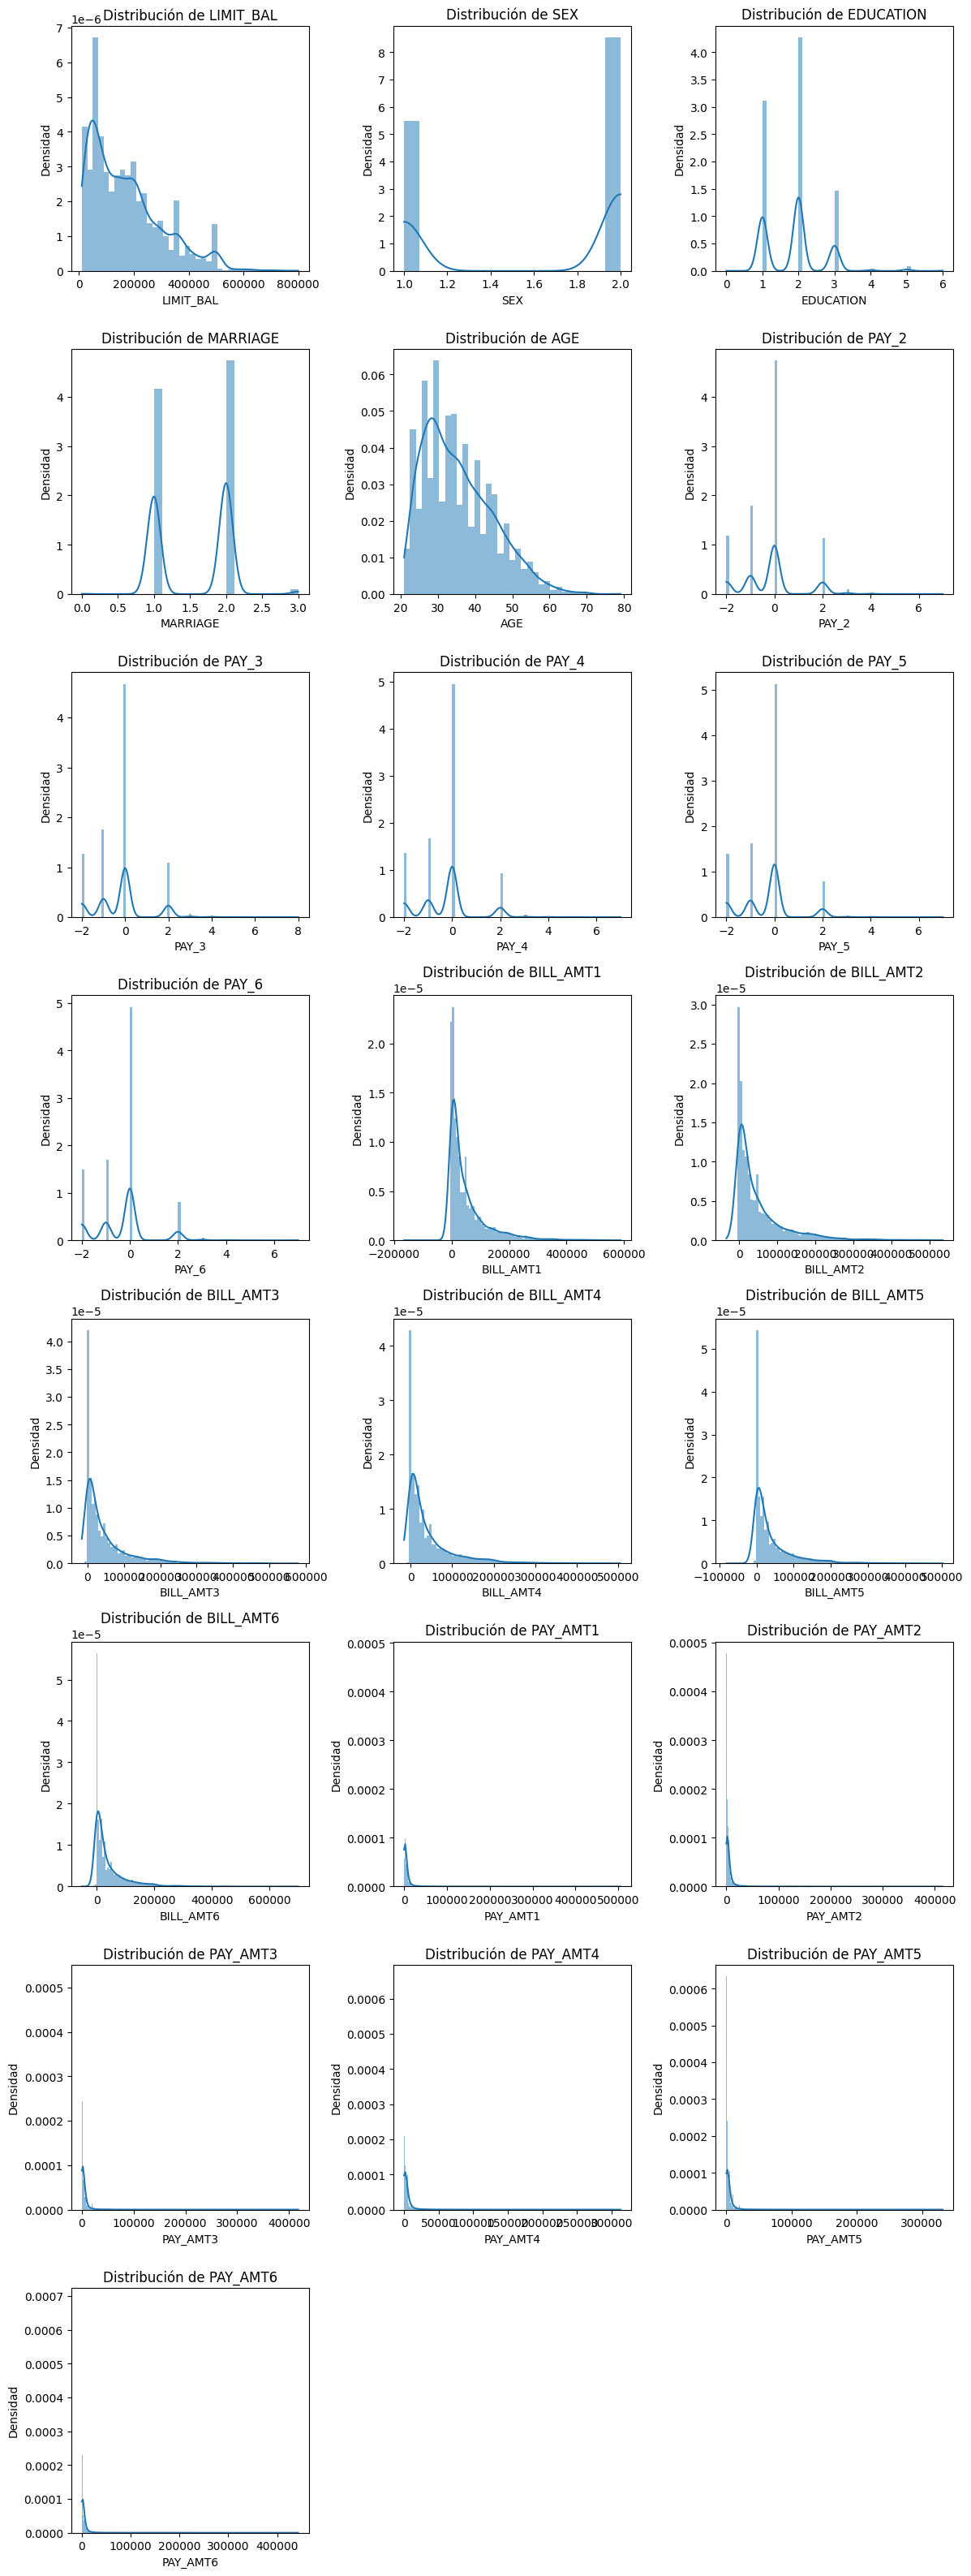

In [246]:
aux = df.drop(columns = 'CUSTOMER_ID')
list_column = aux.columns

num_var = len(list_column)
cols = 3
rows = (num_var // cols) + (num_var % cols > 0)
plt.figure(figsize=(cols * 4, rows * 4))

for i, var in enumerate(list_column, 1):
    plt.subplot(rows, cols, i)  
    sns.histplot(df[var], kde=True, stat="density", linewidth=0)
    plt.plot(linewidth=2)
    plt.title(f'Distribución de {var}')
    plt.xlabel(var)
    plt.ylabel('Densidad')

plt.tight_layout()
plt.show()

### Ingenieria de variables

In [247]:
df.describe()

CUSTOMER_ID      LIMIT_BAL          SEX    EDUCATION     MARRIAGE  \
count   5625.000000    5625.000000  5625.000000  5625.000000  5625.000000   
mean   14881.272000  170283.733333     1.609244     1.858844     1.547022   
std     8655.054802  131513.486564     0.487963     0.788872     0.523252   
min        1.000000   10000.000000     1.000000     0.000000     0.000000   
25%     7358.000000   60000.000000     1.000000     1.000000     1.000000   
50%    14903.000000  140000.000000     2.000000     2.000000     2.000000   
75%    22352.000000  240000.000000     2.000000     2.000000     2.000000   
max    29997.000000  800000.000000     2.000000     6.000000     3.000000   

               AGE        PAY_2        PAY_3        PAY_4        PAY_5  \
count  5625.000000  5625.000000  5625.000000  5625.000000  5625.000000   
mean     35.480178    -0.150222    -0.184889    -0.240000    -0.279822   
std       9.204122     1.195956     1.194740     1.147234     1.099395   
min      21.000000    -2.000000    -2.000000    -2.000000    -2.000000   
25%      28.000000    -1.000000    -1.000000    -1.000000    -1.000000   
50%      34.000000     0.000000     0.000000     0.000000     0.000000   
75%      42.000000     0.000000     0.000000     0.000000     0.000000   
max      79.000000     7.000000     8.000000     7.000000     7.000000   

             PAY_6      BILL_AMT1      BILL_AMT2      BILL_AMT3  \
count  5625.000000    5625.000000    5625.000000    5625.000000   
mean     -0.304178   51475.919111   49794.312711   47538.054756   
std       1.120461   72596.576983   70303.014428   68324.469908   
min      -2.000000 -165580.000000  -33350.000000  -15641.000000   
25%      -1.000000    3724.000000    3077.000000    2786.000000   
50%       0.000000   22957.000000   21705.000000   20424.000000   
75%       0.000000   68168.000000   65785.000000   60992.000000   
max       7.000000  588000.000000  534289.000000  578971.000000   

           BILL_AMT4      BILL_AMT5      BILL_AMT6       PAY_AMT1  \
count    5625.000000    5625.000000    5625.000000    5625.000000   
mean    43886.864533   40847.769778   39533.191467    6050.843378   
std     64145.186775   60618.464156   59577.948403   18509.895896   
min    -15588.000000  -81334.000000  -51443.000000       0.000000   
25%      2126.000000    1639.000000    1346.000000    1000.000000   
50%     19212.000000   18187.000000   17328.000000    2200.000000   
75%     55957.000000   52471.000000   50524.000000    5096.000000   
max    504929.000000  501474.000000  699944.000000  505000.000000   

            PAY_AMT2       PAY_AMT3       PAY_AMT4       PAY_AMT5  \
count    5625.000000    5625.000000    5625.000000    5625.000000   
mean     5438.163022    5189.431644    4839.233956    4776.414222   
std     14978.604883   16795.769086   15367.922842   14710.034313   
min         0.000000       0.000000       0.000000       0.000000   
25%       832.000000     396.000000     311.000000     300.000000   
50%      2065.000000    1862.000000    1500.000000    1604.000000   
75%      5000.000000    4773.000000    4000.000000    4300.000000   
max    415552.000000  417588.000000  313094.000000  331788.000000   

            PAY_AMT6  
count    5625.000000  
mean     5069.621689  
std     16633.591621  
min         0.000000  
25%       189.000000  
50%      1500.000000  
75%      4000.000000  
max    443001.000000

In [248]:
df

CUSTOMER_ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_2  PAY_3  \
0           20558    80000.0    2          3         2   28      0      0   
1            5767   280000.0    2          2         1   37      0      0   
2             664   140000.0    2          3         2   59      2      0   
3           17845   160000.0    1          2         1   52     -1      2   
4            7324    90000.0    2          2         2   23      0      0   
...           ...        ...  ...        ...       ...  ...    ...    ...   
5620        13139    80000.0    1          3         1   49      0      0   
5621        22206    80000.0    1          3         1   42     -2     -2   
5622        19489   340000.0    2          2         1   36      0      0   
5623        27693    20000.0    2          2         1   43      0      0   
5624        29276    70000.0    1          1         2   29      2      0   

      PAY_4  PAY_5  PAY_6  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  \
0         0      0      0    77450.0    78100.0    76204.0    66876.0   
1         0      0      0    29078.0    30144.0    32629.0    35126.0   
2         0      0      0    63654.0    62042.0    63445.0    63729.0   
3        -1      2     -1      390.0      780.0      390.0     1080.0   
4         0      0      0    13107.0    13740.0    14770.0    13306.0   
...     ...    ...    ...        ...        ...        ...        ...   
5620      0     -2     -2    77985.0    80886.0    82150.0        0.0   
5621     -2     -2     -2    -1590.0    -6256.0   -10922.0   -15588.0   
5622      0      0      0     3058.0     4087.0     5129.0     3142.0   
5623      0      0      0     6459.0     7470.0     8492.0     9547.0   
5624      0      0      0    71267.0    67401.0    63239.0    23163.0   

      BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  \
0       66182.0    67199.0    3500.0    2600.0    2400.0    2500.0    2700.0   
1       35759.0    42317.0    1515.0    3000.0    3000.0    1292.0    7147.0   
2       63751.0    65421.0       0.0    3000.0    2000.0    2000.0    2000.0   
3         540.0      390.0     780.0       0.0    1080.0       0.0     390.0   
4       10465.0     9704.0    1251.0    1281.0    1173.0     500.0    1000.0   
...         ...        ...       ...       ...       ...       ...       ...   
5620        0.0        0.0    4200.0    3800.0       0.0       0.0       0.0   
5621   -20254.0   -24920.0    4666.0    4666.0    4666.0    4666.0     266.0   
5622     3210.0     4153.0    1087.0    1129.0    1052.0     120.0    1000.0   
5623    20766.0    12197.0    1123.0    1145.0    1200.0    2000.0    3000.0   
5624    41106.0    42021.0       5.0    2910.0    1000.0   20000.0    1600.0   

      PAY_AMT6  
0       2300.0  
1       1415.0  
2       3000.0  
3        390.0  
4       1000.0  
...        ...  
5620       0.0  
5621       0.0  
5622    1000.0  
5623    1000.0  
5624    2000.0  

[5625 rows x 23 columns]

In [249]:
# Ratio de deuda respecto al limite de credito
df['Ratio_Debt'] = df[['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']].sum(axis = 1)/df['LIMIT_BAL'] 

In [250]:
df['Max_Estatus_Pay'] = df[['PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']].max(axis = 1) # Maximo valor Pay

In [251]:
df['Promedio_Estatus_Pay'] = df[['PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']].mean(axis = 1) # Promedio valor Pay

In [252]:
df['Ratio_Payment'] = df[['PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']].sum(axis = 1) / df['LIMIT_BAL'] # Cantidad pagada sobre limite de credito

In [253]:
df['Count_Pay_Retrasados'] = (df[['PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']] > 0 ).sum(axis = 1) # Conrteo de registros de meses atrasados

In [254]:
df['Count_Pay_A_Tiempo'] = (df[['PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']] == -1).sum(axis = 1) # Conteo de meses pagados a tiempo

In [255]:
df['Total_Pay'] = df[['PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']].sum(axis = 1) # Total pagado 

In [256]:
df['Total_Bill'] = df[['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']].sum(axis = 1) # Deuda total

In [257]:
df['Pay/Bill'] =np.where(df['Total_Bill'] == 0, 0, df['Total_Pay'] / df['Total_Bill']) # Ratio de pago sobre deuda

In [258]:
df['Pay_amount_mean'] = df[['PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']].mean(axis = 1) # Promedio de cantidad a pagar

In [259]:
len(df[df['Pay/Bill'] == np.inf])

0

In [260]:
df['Pay_tendencia'] = df['PAY_AMT2'] - df ['PAY_AMT6'] # Comparacion del ultimo mes y el primero respecto a lo que se paga

In [261]:
df['Bill_tendencia'] = df['BILL_AMT1'] - df['BILL_AMT6'] # Comparacion del ultimo mes y el primero respecto a la deuda

In [262]:
df['Bill_amount_mean'] = df[['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']].mean(axis = 1) # Promedio de cantidad de deuda

In [263]:
df['Diff_Bill_Pay'] = df['Total_Bill'] - df ['Total_Pay'] # Diferencia de Deuda con lo que se paga

In [264]:
df['Pay_tendencia_Amplia'] = df[['PAY_AMT2','PAY_AMT3']].mean(axis = 1) - df[['PAY_AMT4','PAY_AMT5','PAY_AMT6']].mean(axis =1)
# Tendencia amplia de la cantidad pagada 

In [265]:
df['Bill_tendencia_Amplia'] = df[['BILL_AMT1','BILL_AMT2','BILL_AMT3']].mean(axis = 1) - df[['BILL_AMT4','BILL_AMT5','BILL_AMT6']].mean(axis =1)
# Tendencia amplia de la deuda

In [266]:
df['Diff_Bill_Pay_Tendencia'] = ((df['BILL_AMT2'] - df['PAY_AMT2']) - (df['BILL_AMT6'] - df['PAY_AMT6']))
# Tendencia de la diferencia entre la deuda y lo pagado 

In [267]:
df['Diff_Bill_Pay_Tendencia_Amplia'] = (
    (df[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3']].mean(axis=1)  - df[['PAY_AMT2', 'PAY_AMT3']].mean(axis=1))
    - 
    ( df[['BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].mean(axis=1) - df[['PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].mean(axis=1))
)
# Tendencia amplia de la diferencia entre la deuda y lo pagado 

In [268]:
df['Meses_Pago_Completo'] = ((df['PAY_AMT2'] >= df['BILL_AMT2']).astype(int) + (df['PAY_AMT3'] >= 
    df['BILL_AMT3']).astype(int) + (df['PAY_AMT4'] >= df['BILL_AMT4']).astype(int) + (df['PAY_AMT5'] >= df['BILL_AMT5']).astype(int) +
    (df['PAY_AMT6'] >= df['BILL_AMT6']).astype(int))

In [269]:
df['Meses_Deuda'] = ((df['PAY_AMT2'] <= df['BILL_AMT2']).astype(int) + (df['PAY_AMT3'] <= 
    df['BILL_AMT3']).astype(int) + (df['PAY_AMT4'] <= df['BILL_AMT4']).astype(int) + (df['PAY_AMT5'] <= df['BILL_AMT5']).astype(int) +
    (df['PAY_AMT6'] <= df['BILL_AMT6']).astype(int))

In [270]:
df['Age_Quartile'] = pd.qcut(df['AGE'], q =4, labels = ['Joven', 'Adulto joven', 'Adulto', 'Mayor'])

In [271]:
df['Pay_tendencia_ponderada'] = (df['PAY_AMT2'] * 1) + (df['PAY_AMT3'] * 0.8) + (df['PAY_AMT4'] * 0.6) + (df['PAY_AMT5'] * 0.4 ) + (
                                df['PAY_AMT6'] * 0.2)
                                

In [272]:
df['Bill_tendencia_ponderada'] = (df['BILL_AMT1'] * 1) + (df['BILL_AMT2'] * 0.85) + (df['BILL_AMT3'] * 0.7) + (df['BILL_AMT4'] * 0.55 ) + (
                                df['BILL_AMT5'] * 0.4) + (df['BILL_AMT6'] * 0.25)
                                

In [273]:
df.isna().sum()

CUSTOMER_ID                       0
LIMIT_BAL                         0
SEX                               0
EDUCATION                         0
MARRIAGE                          0
AGE                               0
PAY_2                             0
PAY_3                             0
PAY_4                             0
PAY_5                             0
PAY_6                             0
BILL_AMT1                         0
BILL_AMT2                         0
BILL_AMT3                         0
BILL_AMT4                         0
BILL_AMT5                         0
BILL_AMT6                         0
PAY_AMT1                          0
PAY_AMT2                          0
PAY_AMT3                          0
PAY_AMT4                          0
PAY_AMT5                          0
PAY_AMT6                          0
Ratio_Debt                        0
Max_Estatus_Pay                   0
Promedio_Estatus_Pay              0
Ratio_Payment                     0
Count_Pay_Retrasados        

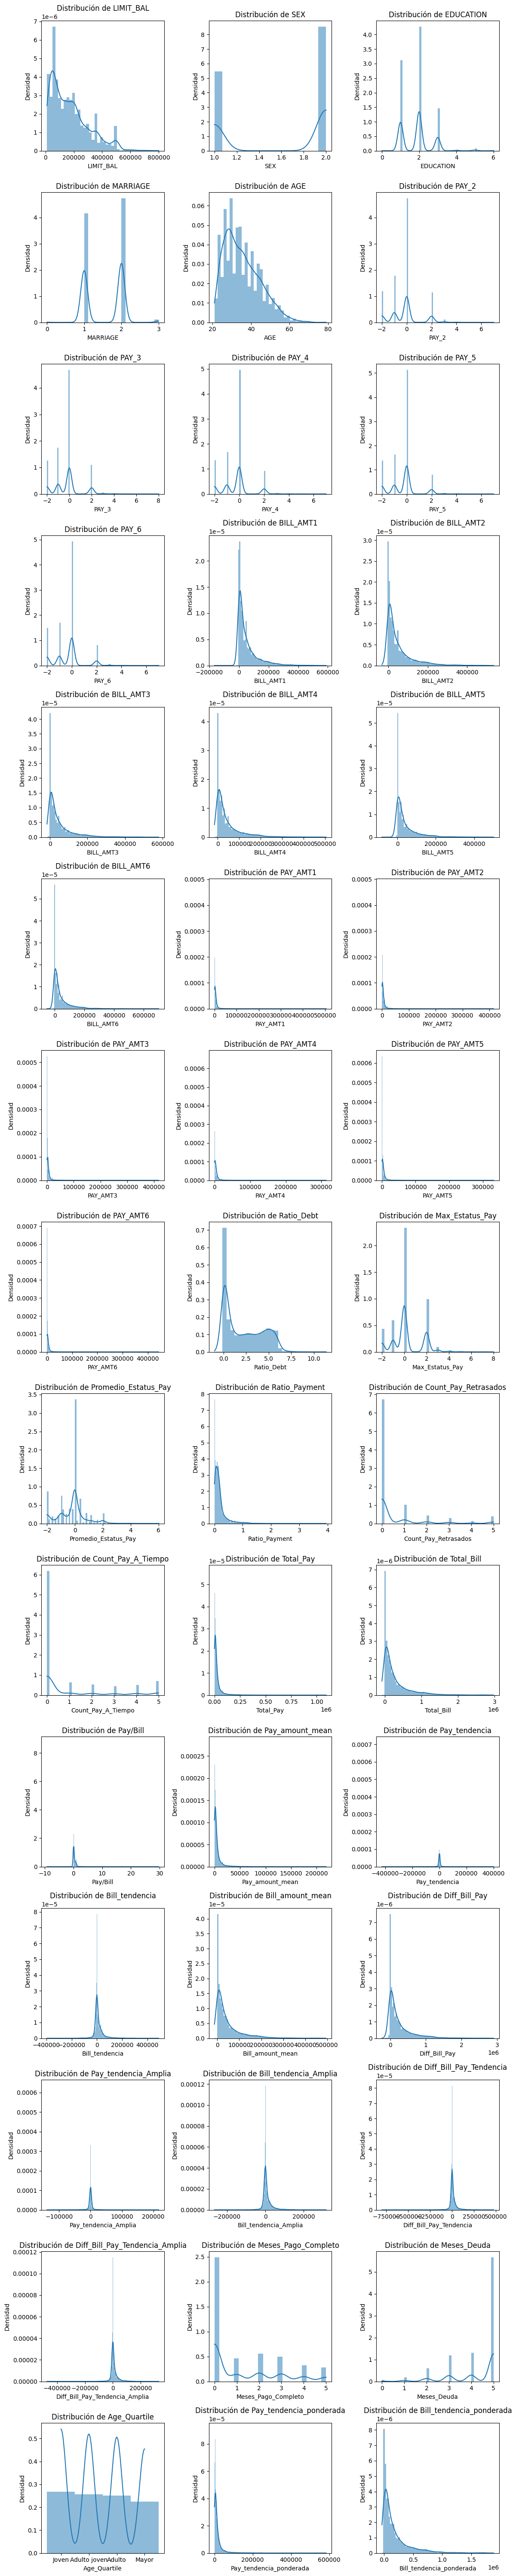

In [274]:
aux = df.drop(columns = 'CUSTOMER_ID')
list_column = aux.columns

num_var = len(list_column)
cols = 3
rows = (num_var // cols) + (num_var % cols > 0)
plt.figure(figsize=(cols * 4, rows * 4))

for i, var in enumerate(list_column, 1):
    plt.subplot(rows, cols, i)  
    sns.histplot(df[var], kde=True, stat="density", linewidth=0)
    plt.plot(linewidth=2)
    plt.title(f'Distribución de {var}')
    plt.xlabel(var)
    plt.ylabel('Densidad')

plt.tight_layout()
plt.show()

In [275]:
lst_column_log = ['LIMIT_BAL','AGE','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT2',
                  'PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6','Ratio_Debt','Ratio_Payment','Total_Pay','Total_Bill',
                  'Pay_amount_mean','Bill_amount_mean','Diff_Bill_Pay','Pay_tendencia_ponderada','Bill_tendencia_ponderada']

In [276]:
df.columns

Index(['CUSTOMER_ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'Ratio_Debt', 'Max_Estatus_Pay', 'Promedio_Estatus_Pay',
       'Ratio_Payment', 'Count_Pay_Retrasados', 'Count_Pay_A_Tiempo',
       'Total_Pay', 'Total_Bill', 'Pay/Bill', 'Pay_amount_mean',
       'Pay_tendencia', 'Bill_tendencia', 'Bill_amount_mean', 'Diff_Bill_Pay',
       'Pay_tendencia_Amplia', 'Bill_tendencia_Amplia',
       'Diff_Bill_Pay_Tendencia', 'Diff_Bill_Pay_Tendencia_Amplia',
       'Meses_Pago_Completo', 'Meses_Deuda', 'Age_Quartile',
       'Pay_tendencia_ponderada', 'Bill_tendencia_ponderada'],
      dtype='object')

In [277]:
lst_column_log

['LIMIT_BAL',
 'AGE',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'Ratio_Debt',
 'Ratio_Payment',
 'Total_Pay',
 'Total_Bill',
 'Pay_amount_mean',
 'Bill_amount_mean',
 'Diff_Bill_Pay',
 'Pay_tendencia_ponderada',
 'Bill_tendencia_ponderada']

In [278]:
for col in lst_column_log:
    offset = abs(df[col].min()) + 1
    df[f'{col}_log'] = np.log1p(df[col] + offset)

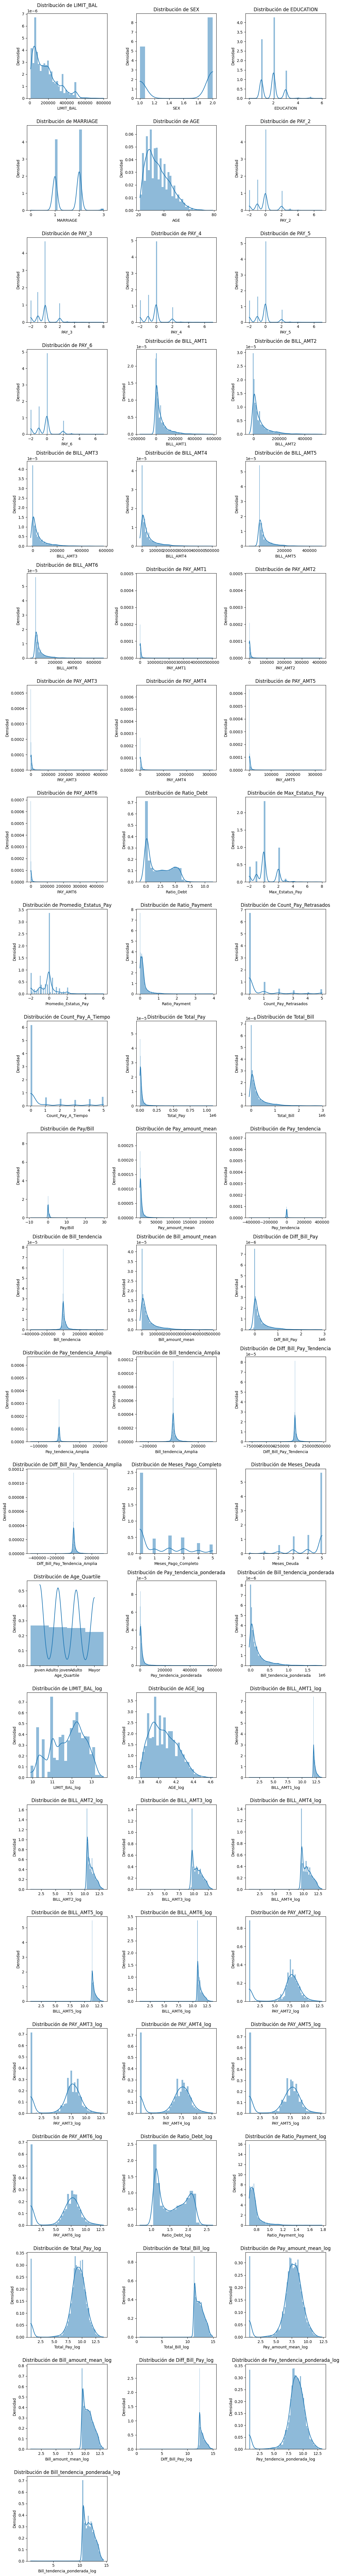

In [279]:
aux = df.drop(columns = 'CUSTOMER_ID')
list_column = aux.columns

num_var = len(list_column)
cols = 3
rows = (num_var // cols) + (num_var % cols > 0)
plt.figure(figsize=(cols * 4, rows * 4))

for i, var in enumerate(list_column, 1):
    plt.subplot(rows, cols, i)  
    sns.histplot(df[var], kde=True, stat="density", linewidth=0)
    plt.plot(linewidth=2)
    plt.title(f'Distribución de {var}')
    plt.xlabel(var)
    plt.ylabel('Densidad')

plt.tight_layout()
plt.show()

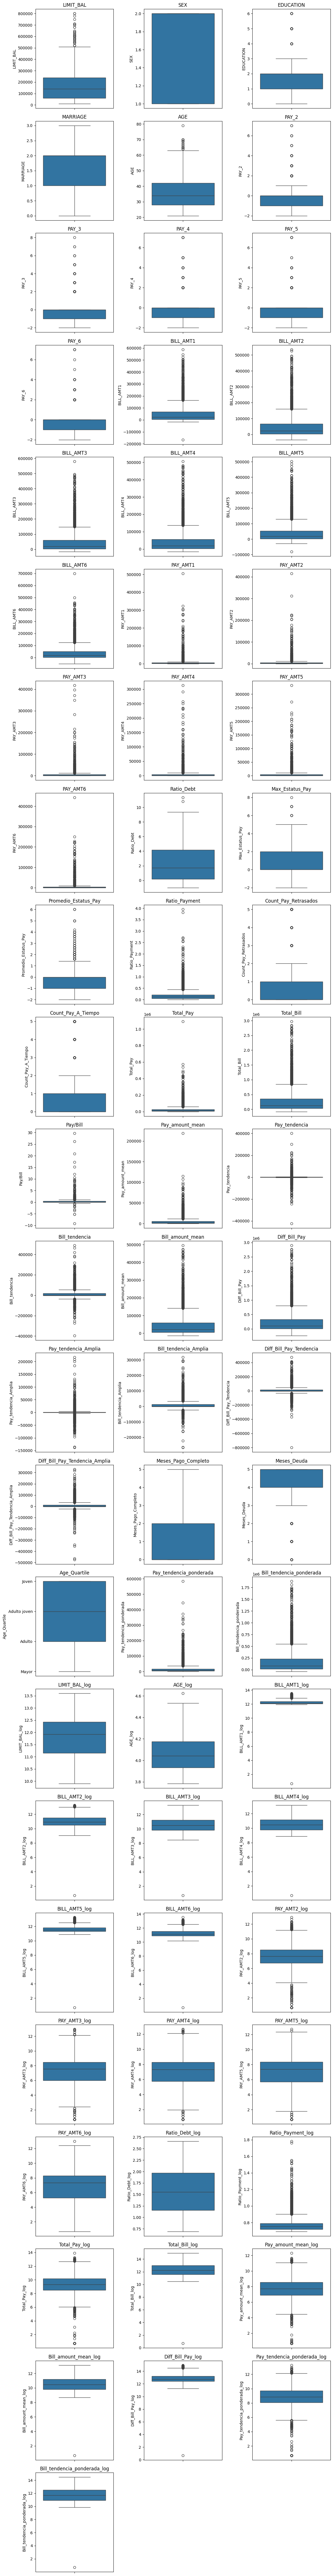

In [280]:
aux = df.drop(columns = 'CUSTOMER_ID')
list_column = aux.columns

num_var = len(list_column)
cols = 3
rows = (num_var // cols) + (num_var % cols > 0)
plt.figure(figsize=(cols * 4, rows * 4))

for i, var in enumerate(list_column, 1):
    plt.subplot(rows, cols, i) 
    sns.boxplot(y=df[var])  
    plt.title(var)  
plt.tight_layout()  
plt.show()


In [281]:
df

CUSTOMER_ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_2  PAY_3  \
0           20558    80000.0    2          3         2   28      0      0   
1            5767   280000.0    2          2         1   37      0      0   
2             664   140000.0    2          3         2   59      2      0   
3           17845   160000.0    1          2         1   52     -1      2   
4            7324    90000.0    2          2         2   23      0      0   
...           ...        ...  ...        ...       ...  ...    ...    ...   
5620        13139    80000.0    1          3         1   49      0      0   
5621        22206    80000.0    1          3         1   42     -2     -2   
5622        19489   340000.0    2          2         1   36      0      0   
5623        27693    20000.0    2          2         1   43      0      0   
5624        29276    70000.0    1          1         2   29      2      0   

      PAY_4  PAY_5  PAY_6  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  \
0         0      0      0    77450.0    78100.0    76204.0    66876.0   
1         0      0      0    29078.0    30144.0    32629.0    35126.0   
2         0      0      0    63654.0    62042.0    63445.0    63729.0   
3        -1      2     -1      390.0      780.0      390.0     1080.0   
4         0      0      0    13107.0    13740.0    14770.0    13306.0   
...     ...    ...    ...        ...        ...        ...        ...   
5620      0     -2     -2    77985.0    80886.0    82150.0        0.0   
5621     -2     -2     -2    -1590.0    -6256.0   -10922.0   -15588.0   
5622      0      0      0     3058.0     4087.0     5129.0     3142.0   
5623      0      0      0     6459.0     7470.0     8492.0     9547.0   
5624      0      0      0    71267.0    67401.0    63239.0    23163.0   

      BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  \
0       66182.0    67199.0    3500.0    2600.0    2400.0    2500.0    2700.0   
1       35759.0    42317.0    1515.0    3000.0    3000.0    1292.0    7147.0   
2       63751.0    65421.0       0.0    3000.0    2000.0    2000.0    2000.0   
3         540.0      390.0     780.0       0.0    1080.0       0.0     390.0   
4       10465.0     9704.0    1251.0    1281.0    1173.0     500.0    1000.0   
...         ...        ...       ...       ...       ...       ...       ...   
5620        0.0        0.0    4200.0    3800.0       0.0       0.0       0.0   
5621   -20254.0   -24920.0    4666.0    4666.0    4666.0    4666.0     266.0   
5622     3210.0     4153.0    1087.0    1129.0    1052.0     120.0    1000.0   
5623    20766.0    12197.0    1123.0    1145.0    1200.0    2000.0    3000.0   
5624    41106.0    42021.0       5.0    2910.0    1000.0   20000.0    1600.0   

      PAY_AMT6  Ratio_Debt  Max_Estatus_Pay  Promedio_Estatus_Pay  \
0       2300.0    5.400137                0                   0.0   
1       1415.0    0.732332                0                   0.0   
2       3000.0    2.728871                2                   0.4   
3        390.0    0.022312                2                   0.2   
4       1000.0    0.834356                0                   0.0   
...        ...         ...              ...                   ...   
5620       0.0    3.012763                0                  -0.8   
5621       0.0   -0.994125               -2                  -2.0   
5622    1000.0    0.066997                0                   0.0   
5623    1000.0    3.246550                0                   0.0   
5624    2000.0    4.402814                2                   0.4   

      Ratio_Payment  Count_Pay_Retrasados  Count_Pay_A_Tiempo  Total_Pay  \
0          0.156250                     0                   0    12500.0   
1          0.056621                     0                   0    15854.0   
2          0.085714                     1                   0    12000.0   
3          0.011625                     2                   3     1860.0   
4          0.055044               

In [282]:
pd.set_option('display.max_rows', None)
df.isnull().sum()

CUSTOMER_ID                       0
LIMIT_BAL                         0
SEX                               0
EDUCATION                         0
MARRIAGE                          0
AGE                               0
PAY_2                             0
PAY_3                             0
PAY_4                             0
PAY_5                             0
PAY_6                             0
BILL_AMT1                         0
BILL_AMT2                         0
BILL_AMT3                         0
BILL_AMT4                         0
BILL_AMT5                         0
BILL_AMT6                         0
PAY_AMT1                          0
PAY_AMT2                          0
PAY_AMT3                          0
PAY_AMT4                          0
PAY_AMT5                          0
PAY_AMT6                          0
Ratio_Debt                        0
Max_Estatus_Pay                   0
Promedio_Estatus_Pay              0
Ratio_Payment                     0
Count_Pay_Retrasados        

In [283]:
pd.reset_option('display.max_rows')

In [284]:
df.describe([0.01, 0.25, 0.5, 0.75, 0.99])

CUSTOMER_ID      LIMIT_BAL          SEX    EDUCATION     MARRIAGE  \
count   5625.000000    5625.000000  5625.000000  5625.000000  5625.000000   
mean   14881.272000  170283.733333     1.609244     1.858844     1.547022   
std     8655.054802  131513.486564     0.487963     0.788872     0.523252   
min        1.000000   10000.000000     1.000000     0.000000     0.000000   
1%       267.720000   10000.000000     1.000000     1.000000     1.000000   
25%     7358.000000   60000.000000     1.000000     1.000000     1.000000   
50%    14903.000000  140000.000000     2.000000     2.000000     2.000000   
75%    22352.000000  240000.000000     2.000000     2.000000     2.000000   
99%    29690.840000  500000.000000     2.000000     5.000000     3.000000   
max    29997.000000  800000.000000     2.000000     6.000000     3.000000   

               AGE        PAY_2        PAY_3        PAY_4        PAY_5  \
count  5625.000000  5625.000000  5625.000000  5625.000000  5625.000000   
mean     35.480178    -0.150222    -0.184889    -0.240000    -0.279822   
std       9.204122     1.195956     1.194740     1.147234     1.099395   
min      21.000000    -2.000000    -2.000000    -2.000000    -2.000000   
1%       22.000000    -2.000000    -2.000000    -2.000000    -2.000000   
25%      28.000000    -1.000000    -1.000000    -1.000000    -1.000000   
50%      34.000000     0.000000     0.000000     0.000000     0.000000   
75%      42.000000     0.000000     0.000000     0.000000     0.000000   
99%      60.000000     3.000000     3.000000     3.000000     2.000000   
max      79.000000     7.000000     8.000000     7.000000     7.000000   

             PAY_6      BILL_AMT1      BILL_AMT2      BILL_AMT3  \
count  5625.000000    5625.000000    5625.000000    5625.000000   
mean     -0.304178   51475.919111   49794.312711   47538.054756   
std       1.120461   72596.576983   70303.014428   68324.469908   
min      -2.000000 -165580.000000  -33350.000000  -15641.000000   
1%       -2.000000     -56.080000    -197.360000    -203.040000   
25%      -1.000000    3724.000000    3077.000000    2786.000000   
50%       0.000000   22957.000000   21705.000000   20424.000000   
75%       0.000000   68168.000000   65785.000000   60992.000000   
99%       2.000000  344539.480000  332711.400000  324852.480000   
max       7.000000  588000.000000  534289.000000  578971.000000   

           BILL_AMT4      BILL_AMT5      BILL_AMT6       PAY_AMT1  \
count    5625.000000    5625.000000    5625.000000    5625.000000   
mean    43886.864533   40847.769778   39533.191467    6050.843378   
std     64145.186775   60618.464156   59577.948403   18509.895896   
min    -15588.000000  -81334.000000  -51443.000000       0.000000   
1%       -191.280000    -200.000000    -200.000000       0.000000   
25%      2126.000000    1639.000000    1346.000000    1000.000000   
50%     19212.000000   18187.000000   17328.000000    2200.000000   
75%     55957.000000   52471.000000   50524.000000    5096.000000   
99%    295426.720000  285393.480000  278393.760000   71483.200000   
max    504929.000000  501474.000000  699944.000000  505000.000000   

            PAY_AMT2       PAY_AMT3       PAY_AMT4       PAY_AMT5  \
count    5625.000000    5625.000000    5625.000000    5625.000000   
mean     5438.163022    5189.431644    4839.233956    4776.414222   
std     14978.604883   16795.769086   15367.922842   14710.034313   
min         0.000000       0.000000       0.000000       0.000000   
1%          0.000000       0.000000       0.000000       0.000000   
25%       832.000000     396.000000     311.000000     300.000000   
50%      2065.000000    1862.000000    1500.000000    1604.000000   
75%      5000.000000    4773.000000    4000.000000    4300.000000   
99%     64831.040000   65381.680000   70000.760000   65221.320000   
max    415552.000000  417588.000000  313094.000000  331788.000000   

            PAY_AMT6   Ratio_Debt  Max_Estatus_Pay  Promedio_Estatus_Pay  \
count    56

### Outiliers

In [285]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5625 entries, 0 to 5624
Data columns (total 68 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   CUSTOMER_ID                     5625 non-null   int64   
 1   LIMIT_BAL                       5625 non-null   float64 
 2   SEX                             5625 non-null   int64   
 3   EDUCATION                       5625 non-null   int64   
 4   MARRIAGE                        5625 non-null   int64   
 5   AGE                             5625 non-null   int64   
 6   PAY_2                           5625 non-null   int64   
 7   PAY_3                           5625 non-null   int64   
 8   PAY_4                           5625 non-null   int64   
 9   PAY_5                           5625 non-null   int64   
 10  PAY_6                           5625 non-null   int64   
 11  BILL_AMT1                       5625 non-null   float64 
 12  BILL_AMT2           

In [286]:
lst_out_upper = ['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6',
           'PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6','Promedio_Estatus_Pay','Ratio_Payment','Total_Pay', 'Total_Bill',
                 'Pay/Bill','Pay_amount_mean','Bill_amount_mean','Diff_Bill_Pay','Ratio_Payment_log','Pay_tendencia_ponderada','Bill_tendencia_ponderada']
lst_out_both = ['Pay/Bill','Pay_tendencia','Bill_tendencia','Pay_tendencia_Amplia','Bill_tendencia_Amplia','Diff_Bill_Pay_Tendencia',
                'Diff_Bill_Pay_Tendencia_Amplia','BILL_AMT1_log','BILL_AMT2_log','BILL_AMT3_log','BILL_AMT4_log','BILL_AMT5_log',
                'BILL_AMT6_log','PAY_AMT2_log','PAY_AMT3_log','PAY_AMT4_log','PAY_AMT5_log','Total_Pay_log','Diff_Bill_Pay_log','Pay_tendencia_ponderada_log']
lst_out_lower = ['Total_Bill_log','Bill_amount_mean_log','Bill_tendencia_ponderada_log']

In [287]:
for v in lst_out_upper: # Debido a la gran cantidad de outliers vistos en los boxplot, aplicamos winsorize parta no perder tantos datos
    df[v] = winsorize(df[v], limits = [0, 0.2])

for v in lst_out_both:
    df[v] = winsorize(df[v], limits = [0.10, 0.10])

for v in lst_out_lower:
    df[v] = winsorize(df[v], limits = [0.2, 0])


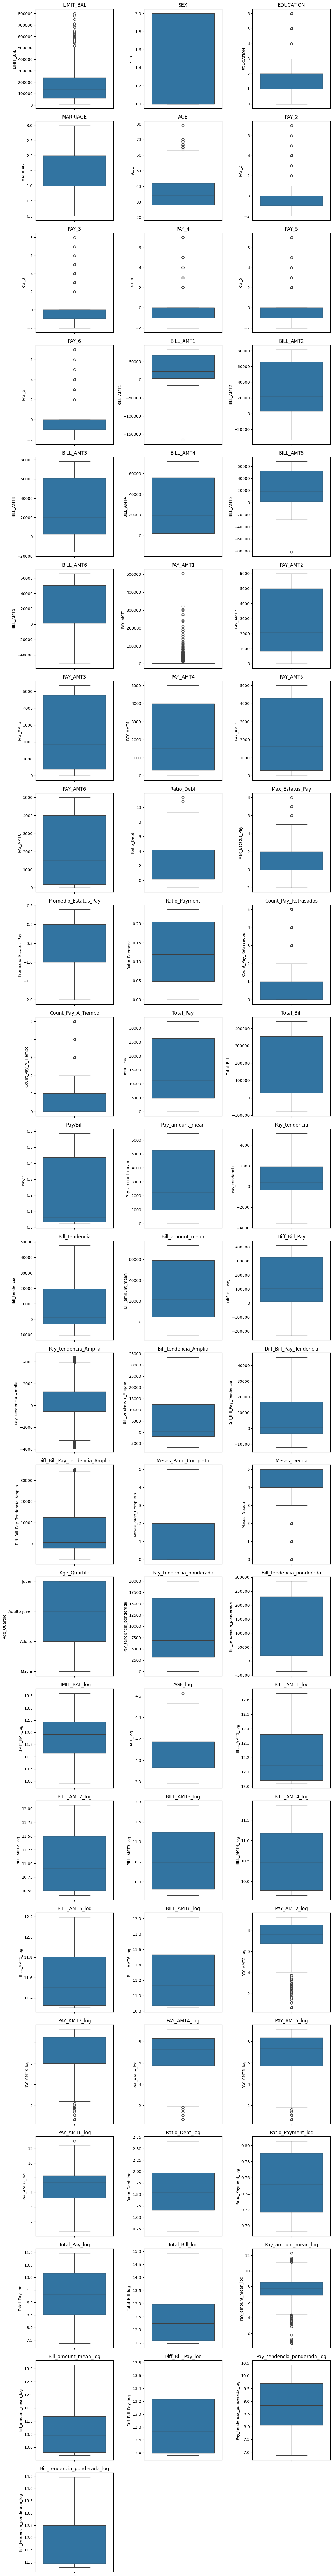

In [288]:
aux = df.drop(columns = 'CUSTOMER_ID')
list_column = aux.columns

num_var = len(list_column)
cols = 3
rows = (num_var // cols) + (num_var % cols > 0)
plt.figure(figsize=(cols * 4, rows * 4))

for i, var in enumerate(list_column, 1):
    plt.subplot(rows, cols, i)  
    sns.boxplot(y=df[var])  
    plt.title(var)  
plt.tight_layout()  
plt.show()

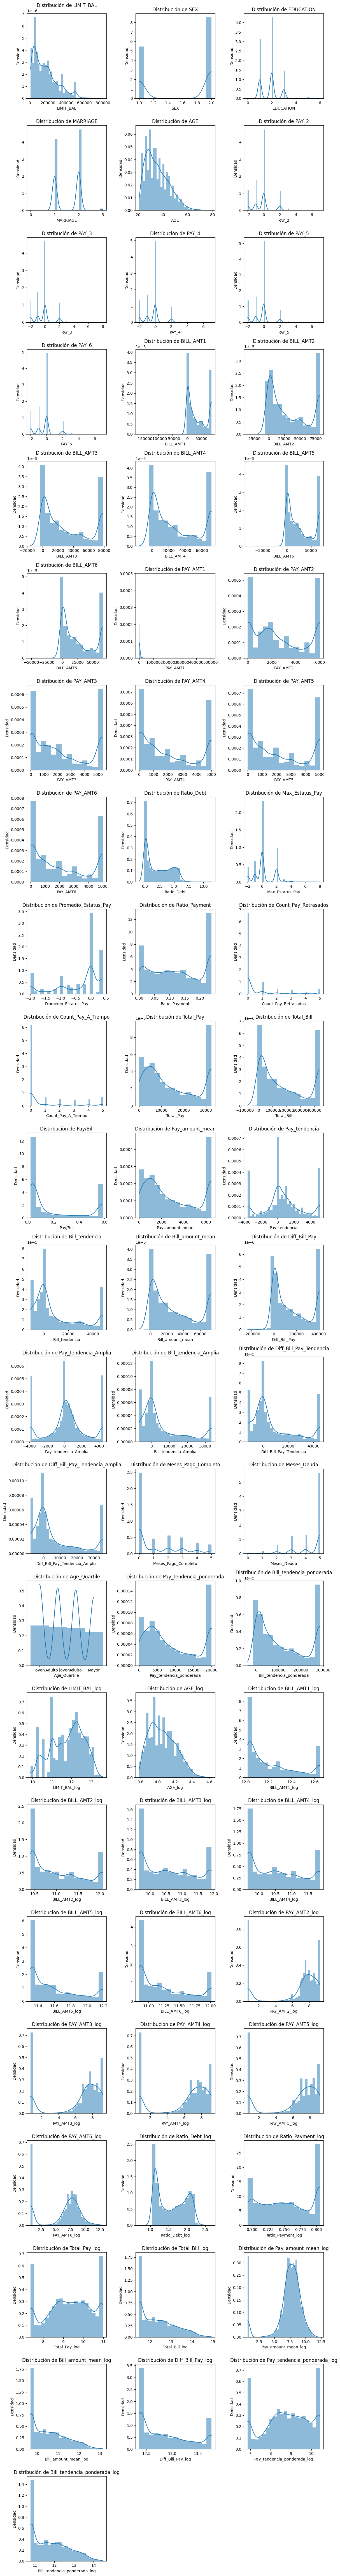

In [289]:
aux = df.drop(columns = 'CUSTOMER_ID')
list_column = aux.columns

num_var = len(list_column)
cols = 3
rows = (num_var // cols) + (num_var % cols > 0)
plt.figure(figsize=(cols * 4, rows * 4))

for i, var in enumerate(list_column, 1):
    plt.subplot(rows, cols, i)  
    sns.histplot(df[var], kde=True, stat="density", linewidth=0)
    plt.plot(linewidth=2)
    plt.title(f'Distribución de {var}')
    plt.xlabel(var)
    plt.ylabel('Densidad')

plt.tight_layout()
plt.show()

### Codificacion

In [290]:
df

CUSTOMER_ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_2  PAY_3  \
0           20558    80000.0    2          3         2   28      0      0   
1            5767   280000.0    2          2         1   37      0      0   
2             664   140000.0    2          3         2   59      2      0   
3           17845   160000.0    1          2         1   52     -1      2   
4            7324    90000.0    2          2         2   23      0      0   
...           ...        ...  ...        ...       ...  ...    ...    ...   
5620        13139    80000.0    1          3         1   49      0      0   
5621        22206    80000.0    1          3         1   42     -2     -2   
5622        19489   340000.0    2          2         1   36      0      0   
5623        27693    20000.0    2          2         1   43      0      0   
5624        29276    70000.0    1          1         2   29      2      0   

      PAY_4  PAY_5  PAY_6  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  \
0         0      0      0    77450.0    78100.0    76204.0    66876.0   
1         0      0      0    29078.0    30144.0    32629.0    35126.0   
2         0      0      0    63654.0    62042.0    63445.0    63729.0   
3        -1      2     -1      390.0      780.0      390.0     1080.0   
4         0      0      0    13107.0    13740.0    14770.0    13306.0   
...     ...    ...    ...        ...        ...        ...        ...   
5620      0     -2     -2    77985.0    80886.0    78252.0        0.0   
5621     -2     -2     -2    -1590.0    -6256.0   -10922.0   -15588.0   
5622      0      0      0     3058.0     4087.0     5129.0     3142.0   
5623      0      0      0     6459.0     7470.0     8492.0     9547.0   
5624      0      0      0    71267.0    67401.0    63239.0    23163.0   

      BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  \
0       66182.0    65942.0    3500.0    2600.0    2400.0    2500.0    2700.0   
1       35759.0    42317.0    1515.0    3000.0    3000.0    1292.0    5000.0   
2       63751.0    65421.0       0.0    3000.0    2000.0    2000.0    2000.0   
3         540.0      390.0     780.0       0.0    1080.0       0.0     390.0   
4       10465.0     9704.0    1251.0    1281.0    1173.0     500.0    1000.0   
...         ...        ...       ...       ...       ...       ...       ...   
5620        0.0        0.0    4200.0    3800.0       0.0       0.0       0.0   
5621   -20254.0   -24920.0    4666.0    4666.0    4666.0    4666.0     266.0   
5622     3210.0     4153.0    1087.0    1129.0    1052.0     120.0    1000.0   
5623    20766.0    12197.0    1123.0    1145.0    1200.0    2000.0    3000.0   
5624    41106.0    42021.0       5.0    2910.0    1000.0    5000.0    1600.0   

      PAY_AMT6  Ratio_Debt  Max_Estatus_Pay  Promedio_Estatus_Pay  \
0       2300.0    5.400137                0                   0.0   
1       1415.0    0.732332                0                   0.0   
2       3000.0    2.728871                2                   0.4   
3        390.0    0.022312                2                   0.2   
4       1000.0    0.834356                0                   0.0   
...        ...         ...              ...                   ...   
5620       0.0    3.012763                0                  -0.8   
5621       0.0   -0.994125               -2                  -2.0   
5622    1000.0    0.066997                0                   0.0   
5623    1000.0    3.246550                0                   0.0   
5624    2000.0    4.402814                2                   0.4   

      Ratio_Payment  Count_Pay_Retrasados  Count_Pay_A_Tiempo  Total_Pay  \
0          0.156250                     0                   0    12500.0   
1          0.056621                     0                   0    15854.0   
2          0.085714                     1                   0    12000.0   
3          0.011625                     2                   3     1860.0   
4          0.055044               

In [291]:
df['Age_Quartile'].unique()

['Joven', 'Adulto', 'Mayor', 'Adulto joven']
Categories (4, object): ['Joven' < 'Adulto joven' < 'Adulto' < 'Mayor']

In [292]:
df = pd.get_dummies(df, columns = ['EDUCATION'],prefix='EDUCATION') # Codificamos las variables para el modelo
df = pd.get_dummies(df, columns = ['MARRIAGE'],prefix='MARRIAGE')
mapeo_Age = {'Joven':1, 'Adulto joven' :2, 'Adulto':3, 'Mayor':4}
df['Age_Quartile'] = df['Age_Quartile'].map(mapeo_Age)

In [293]:
df

CUSTOMER_ID  LIMIT_BAL  SEX  AGE  PAY_2  PAY_3  PAY_4  PAY_5  PAY_6  \
0           20558    80000.0    2   28      0      0      0      0      0   
1            5767   280000.0    2   37      0      0      0      0      0   
2             664   140000.0    2   59      2      0      0      0      0   
3           17845   160000.0    1   52     -1      2     -1      2     -1   
4            7324    90000.0    2   23      0      0      0      0      0   
...           ...        ...  ...  ...    ...    ...    ...    ...    ...   
5620        13139    80000.0    1   49      0      0      0     -2     -2   
5621        22206    80000.0    1   42     -2     -2     -2     -2     -2   
5622        19489   340000.0    2   36      0      0      0      0      0   
5623        27693    20000.0    2   43      0      0      0      0      0   
5624        29276    70000.0    1   29      2      0      0      0      0   

      BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  \
0       77450.0    78100.0    76204.0    66876.0    66182.0    65942.0   
1       29078.0    30144.0    32629.0    35126.0    35759.0    42317.0   
2       63654.0    62042.0    63445.0    63729.0    63751.0    65421.0   
3         390.0      780.0      390.0     1080.0      540.0      390.0   
4       13107.0    13740.0    14770.0    13306.0    10465.0     9704.0   
...         ...        ...        ...        ...        ...        ...   
5620    77985.0    80886.0    78252.0        0.0        0.0        0.0   
5621    -1590.0    -6256.0   -10922.0   -15588.0   -20254.0   -24920.0   
5622     3058.0     4087.0     5129.0     3142.0     3210.0     4153.0   
5623     6459.0     7470.0     8492.0     9547.0    20766.0    12197.0   
5624    71267.0    67401.0    63239.0    23163.0    41106.0    42021.0   

      PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  Ratio_Debt  \
0       3500.0    2600.0    2400.0    2500.0    2700.0    2300.0    5.400137   
1       1515.0    3000.0    3000.0    1292.0    5000.0    1415.0    0.732332   
2          0.0    3000.0    2000.0    2000.0    2000.0    3000.0    2.728871   
3        780.0       0.0    1080.0       0.0     390.0     390.0    0.022312   
4       1251.0    1281.0    1173.0     500.0    1000.0    1000.0    0.834356   
...        ...       ...       ...       ...       ...       ...         ...   
5620    4200.0    3800.0       0.0       0.0       0.0       0.0    3.012763   
5621    4666.0    4666.0    4666.0    4666.0     266.0       0.0   -0.994125   
5622    1087.0    1129.0    1052.0     120.0    1000.0    1000.0    0.066997   
5623    1123.0    1145.0    1200.0    2000.0    3000.0    1000.0    3.246550   
5624       5.0    2910.0    1000.0    5000.0    1600.0    2000.0    4.402814   

      Max_Estatus_Pay  Promedio_Estatus_Pay  Ratio_Payment  \
0                   0                   0.0       0.156250   
1                   0                   0.0       0.056621   
2                   2                   0.4       0.085714   
3                   2                   0.2       0.011625   
4                   0                   0.0       0.055044   
...               ...                   ...            ...   
5620                0                  -0.8       0.047500   
5621               -2                  -2.0       0.178300   
5622                0                   0.0       0.012650   
5623                0                   0.0       0.237700   
5624                2                   0.4       0.237700   

      Count_Pay_Retrasados  Count_Pay_A_Tiempo  Total_Pay  Total_Bill  \
0                        0                   0    12500.0    432011.0   
1                        0                   0    15854.0    205053.0   
2                        1                   0    12000.0    382042.0   
3                        2                   3     1860.0      3570.0   
4                        0                   0     4954.0     75092.0   
...                    ...                 ...  

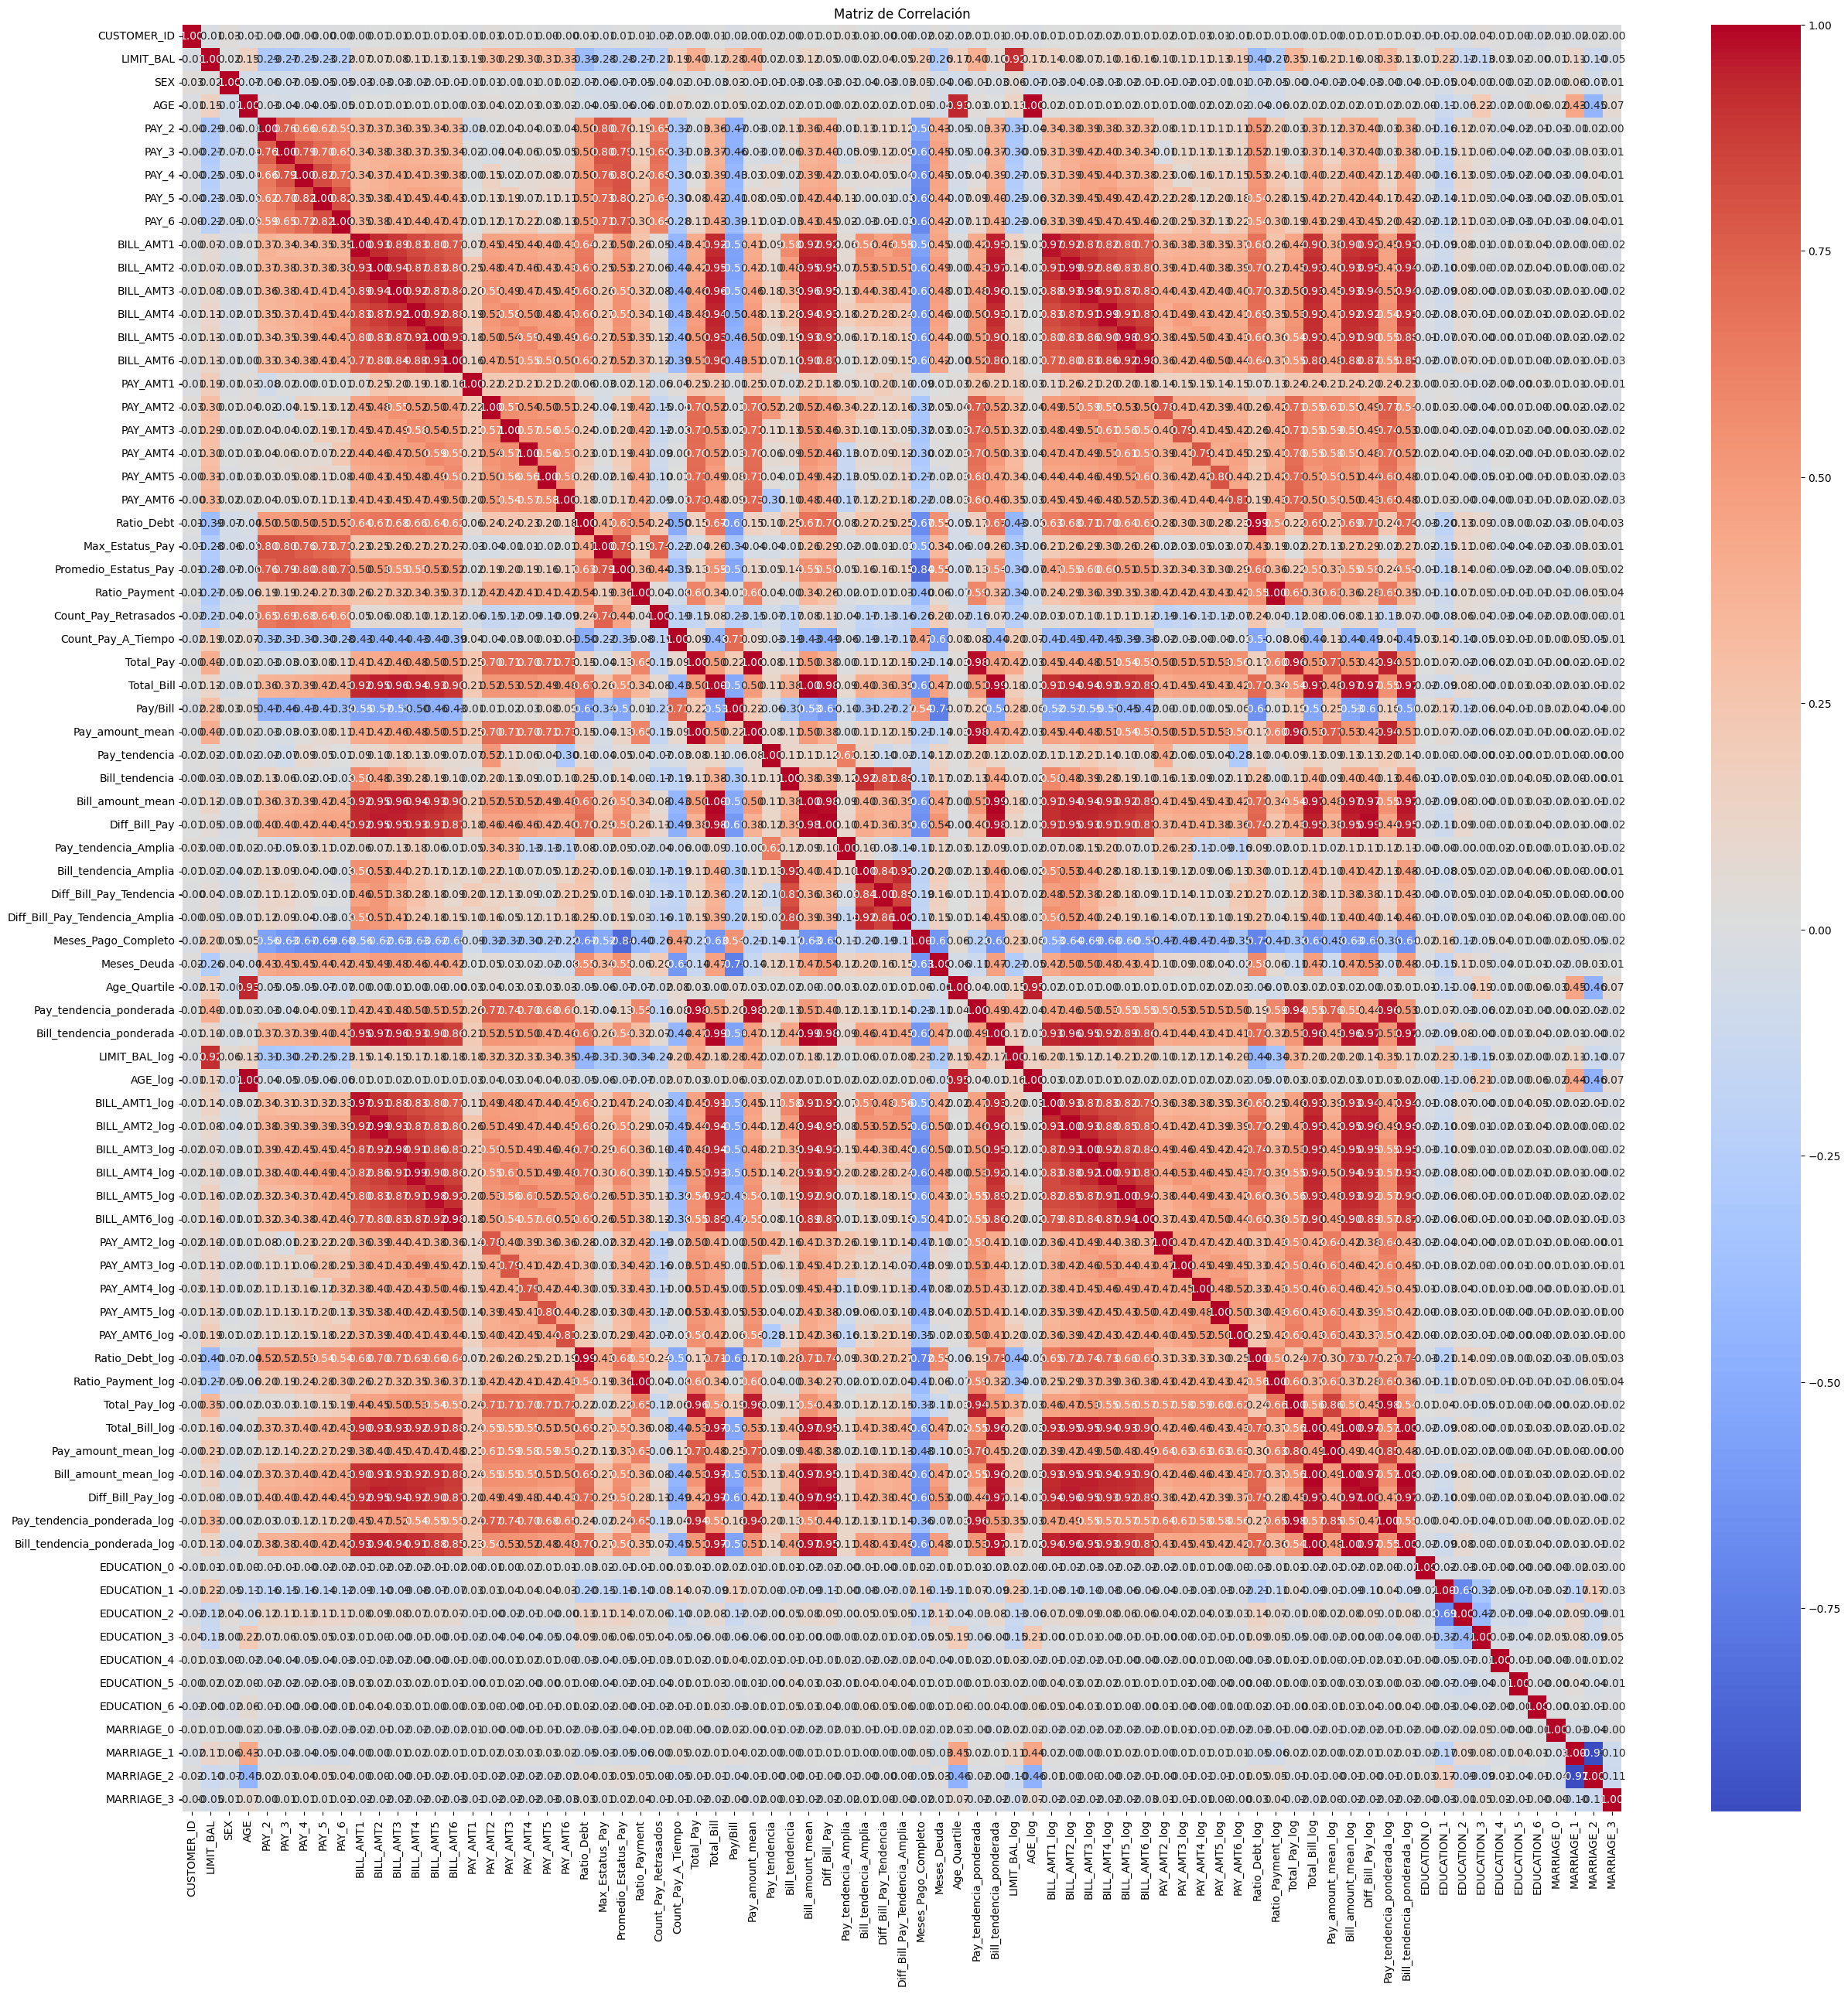

In [294]:
correlation_matrix = df.corr()
target_correlation = correlation_matrix["PAY_AMT1"].sort_values(ascending=False)
plt.figure(figsize=(30, 30))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()

In [295]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5625 entries, 0 to 5624
Data columns (total 77 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   CUSTOMER_ID                     5625 non-null   int64   
 1   LIMIT_BAL                       5625 non-null   float64 
 2   SEX                             5625 non-null   int64   
 3   AGE                             5625 non-null   int64   
 4   PAY_2                           5625 non-null   int64   
 5   PAY_3                           5625 non-null   int64   
 6   PAY_4                           5625 non-null   int64   
 7   PAY_5                           5625 non-null   int64   
 8   PAY_6                           5625 non-null   int64   
 9   BILL_AMT1                       5625 non-null   float64 
 10  BILL_AMT2                       5625 non-null   float64 
 11  BILL_AMT3                       5625 non-null   float64 
 12  BILL_AMT4           

In [296]:
numeric_columns = df.select_dtypes(include = ['float64']).columns

In [297]:
numeric_columns

Index(['LIMIT_BAL', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'Ratio_Debt',
       'Promedio_Estatus_Pay', 'Ratio_Payment', 'Total_Pay', 'Total_Bill',
       'Pay/Bill', 'Pay_amount_mean', 'Pay_tendencia', 'Bill_tendencia',
       'Bill_amount_mean', 'Diff_Bill_Pay', 'Pay_tendencia_Amplia',
       'Bill_tendencia_Amplia', 'Diff_Bill_Pay_Tendencia',
       'Diff_Bill_Pay_Tendencia_Amplia', 'Pay_tendencia_ponderada',
       'Bill_tendencia_ponderada', 'LIMIT_BAL_log', 'AGE_log', 'BILL_AMT1_log',
       'BILL_AMT2_log', 'BILL_AMT3_log', 'BILL_AMT4_log', 'BILL_AMT5_log',
       'BILL_AMT6_log', 'PAY_AMT2_log', 'PAY_AMT3_log', 'PAY_AMT4_log',
       'PAY_AMT5_log', 'PAY_AMT6_log', 'Ratio_Debt_log', 'Ratio_Payment_log',
       'Total_Pay_log', 'Total_Bill_log', 'Pay_amount_mean_log',
       'Bill_amount_mean_log', 'Diff_Bill_Pay_log',
       'Pay_tendencia_ponderada_log',

In [298]:
len(numeric_columns)

52

In [299]:
numeric_columns = [col for col in numeric_columns if col != 'PAY_AMT1']

In [300]:
numeric_columns

['LIMIT_BAL',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'Ratio_Debt',
 'Promedio_Estatus_Pay',
 'Ratio_Payment',
 'Total_Pay',
 'Total_Bill',
 'Pay/Bill',
 'Pay_amount_mean',
 'Pay_tendencia',
 'Bill_tendencia',
 'Bill_amount_mean',
 'Diff_Bill_Pay',
 'Pay_tendencia_Amplia',
 'Bill_tendencia_Amplia',
 'Diff_Bill_Pay_Tendencia',
 'Diff_Bill_Pay_Tendencia_Amplia',
 'Pay_tendencia_ponderada',
 'Bill_tendencia_ponderada',
 'LIMIT_BAL_log',
 'AGE_log',
 'BILL_AMT1_log',
 'BILL_AMT2_log',
 'BILL_AMT3_log',
 'BILL_AMT4_log',
 'BILL_AMT5_log',
 'BILL_AMT6_log',
 'PAY_AMT2_log',
 'PAY_AMT3_log',
 'PAY_AMT4_log',
 'PAY_AMT5_log',
 'PAY_AMT6_log',
 'Ratio_Debt_log',
 'Ratio_Payment_log',
 'Total_Pay_log',
 'Total_Bill_log',
 'Pay_amount_mean_log',
 'Bill_amount_mean_log',
 'Diff_Bill_Pay_log',
 'Pay_tendencia_ponderada_log',
 'Bill_tendencia_ponderada_log']

In [301]:
categorical_columns = df.select_dtypes(exclude = ['float64']).columns

In [302]:
categorical_columns

Index(['CUSTOMER_ID', 'SEX', 'AGE', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'PAY_6', 'Max_Estatus_Pay', 'Count_Pay_Retrasados',
       'Count_Pay_A_Tiempo', 'Meses_Pago_Completo', 'Meses_Deuda',
       'Age_Quartile', 'EDUCATION_0', 'EDUCATION_1', 'EDUCATION_2',
       'EDUCATION_3', 'EDUCATION_4', 'EDUCATION_5', 'EDUCATION_6',
       'MARRIAGE_0', 'MARRIAGE_1', 'MARRIAGE_2', 'MARRIAGE_3'],
      dtype='object')

In [303]:
sc = StandardScaler()
y = df['PAY_AMT1']
df_scaled = sc.fit_transform(df[numeric_columns])
df_scaled = pd.DataFrame(df_scaled, columns = numeric_columns)

In [304]:
df_scaled.describe() # Comprobamos que se aplico standar_scaler correctamente

LIMIT_BAL     BILL_AMT1     BILL_AMT2     BILL_AMT3     BILL_AMT4  \
count  5.625000e+03  5.625000e+03  5.625000e+03  5.625000e+03  5.625000e+03   
mean  -3.157968e-17  1.048445e-16 -1.149500e-16 -5.052748e-18  7.073848e-17   
std    1.000089e+00  1.000089e+00  1.000089e+00  1.000089e+00  1.000089e+00   
min   -1.218871e+00 -6.175730e+00 -2.107960e+00 -1.566718e+00 -1.602403e+00   
25%   -8.386481e-01 -9.457709e-01 -9.554664e-01 -9.556921e-01 -9.612867e-01   
50%   -2.302914e-01 -3.516455e-01 -3.661054e-01 -3.708286e-01 -3.428995e-01   
75%    5.301545e-01  1.044964e+00  1.028517e+00  9.743771e-01  9.869984e-01   
max    4.788651e+00  1.521364e+00  1.528753e+00  1.546706e+00  1.552001e+00   

          BILL_AMT5     BILL_AMT6      PAY_AMT2      PAY_AMT3      PAY_AMT4  \
count  5.625000e+03  5.625000e+03  5.625000e+03  5.625000e+03  5.625000e+03   
mean   3.410605e-17 -1.263187e-17  3.157968e-17  8.273875e-17 -4.863270e-17   
std    1.000089e+00  1.000089e+00  1.000089e+00  1.000089e+00  1.000089e+00   
min   -4.104716e+00 -3.010901e+00 -1.226710e+00 -1.149547e+00 -1.089705e+00   
25%   -9.538729e-01 -9.497712e-01 -8.511826e-01 -9.544402e-01 -9.274427e-01   
50%   -3.254739e-01 -3.257591e-01 -2.946611e-01 -2.321499e-01 -3.070878e-01   
75%    9.764375e-01  9.703682e-01  1.030068e+00  1.202084e+00  9.972750e-01   
max    1.567546e+00  1.572359e+00  1.481423e+00  1.484398e+00  1.519020e+00   

           PAY_AMT5      PAY_AMT6    Ratio_Debt  Promedio_Estatus_Pay  \
count  5.625000e+03  5.625000e+03  5.625000e+03          5.625000e+03   
mean  -1.111605e-16 -4.484314e-17 -2.652693e-17          4.989589e-17   
std    1.000089e+00  1.000089e+00  1.000089e+00          1.000089e+00   
min   -1.108392e+00 -1.075989e+00 -1.539246e+00         -2.153230e+00   
25%   -9.536002e-01 -9.779756e-01 -9.824450e-01         -8.250522e-01   
50%   -2.807715e-01 -2.981080e-01 -2.443426e-01          5.031255e-01   
75%    1.110292e+00  9.983596e-01  9.263546e-01          5.031255e-01   
max    1.471473e+00  1.516947e+00  4.337723e+00          1.034397e+00   

       Ratio_Payment     Total_Pay    Total_Bill      Pay/Bill  \
count   5.625000e+03  5.625000e+03  5.625000e+03  5.625000e+03   
mean    1.263187e-18 -1.073709e-17 -5.431704e-17 -5.052748e-18   
std     1.000089e+00  1.000089e+00  1.000089e+00  1.000089e+00   
min    -1.491383e+00 -1.285329e+00 -1.582738e+00 -8.076834e-01   
25%    -9.048172e-01 -8.576573e-01 -9.310737e-01 -7.620643e-01   
50%    -5.031737e-02 -3.088667e-01 -3.390903e-01 -6.451006e-01   
75%     9.787664e-01  9.921045e-01  1.024004e+00  1.011299e+00   
max     1.381544e+00  1.511716e+00  1.542187e+00  1.672868e+00   

       Pay_amount_mean  Pay_tendencia  Bill_tendencia  Bill_amount_mean  \
count     5.625000e+03   5.625000e+03    5.625000e+03      5.625000e+03   
mean      1.001076e-16  -2.021099e-17   -2.147418e-17      9.473903e-17   
std       1.000089e+00   1.000089e+00    1.000089e+00      1.000089e+00   
min      -1.285329e+00  -1.777461e+00   -1.083264e+00     -1.582738e+00   
25%      -8.576573e-01  -4.163581e-01   -6.705870e-01     -9.310737e-01   
50%      -3.088667e-01  -1.052013e-01   -4.579233e-01     -3.390903e-01   
75%       9.921045e-01   5.121206e-01    5.641867e-01      1.024004e+00   
max       1.511716e+00   1.855752e+00    2.090348e+00      1.542187e+00   

       Diff_Bill_Pay  Pay_tendencia_Amplia  Bill_tendencia_Amplia  \
count   5.625000e+03          5.625000e+03           5.625000e+03   
mean   -3.536924e-17          2.779012e-17           2.273737e-17   
std     1.000089e+00          1.000089e+00           1.000089e+00   
min    -2.456161e+00         -1.879933e+00          -1.047312e+00   
25%    -9.489328e-01         -3.846975e-01          -6.505107e-01   
50%    -3.416478e-01         -3.035515e-02          -4.541087e-01   
75%     1.018456e+00          4.240801e-01           4.860535e-01   
max     1.548913e+00          1.849409e+00           2.151924e+00   

       Diff_Bill_Pay_Tendencia  Dif

In [305]:
df_categorical = df[categorical_columns]

In [306]:
df_categorical

CUSTOMER_ID  SEX  AGE  PAY_2  PAY_3  PAY_4  PAY_5  PAY_6  \
0           20558    2   28      0      0      0      0      0   
1            5767    2   37      0      0      0      0      0   
2             664    2   59      2      0      0      0      0   
3           17845    1   52     -1      2     -1      2     -1   
4            7324    2   23      0      0      0      0      0   
...           ...  ...  ...    ...    ...    ...    ...    ...   
5620        13139    1   49      0      0      0     -2     -2   
5621        22206    1   42     -2     -2     -2     -2     -2   
5622        19489    2   36      0      0      0      0      0   
5623        27693    2   43      0      0      0      0      0   
5624        29276    1   29      2      0      0      0      0   

      Max_Estatus_Pay  Count_Pay_Retrasados  Count_Pay_A_Tiempo  \
0                   0                     0                   0   
1                   0                     0                   0   
2                   2                     1                   0   
3                   2                     2                   3   
4                   0                     0                   0   
...               ...                   ...                 ...   
5620                0                     0                   0   
5621               -2                     0                   0   
5622                0                     0                   0   
5623                0                     0                   0   
5624                2                     1                   0   

      Meses_Pago_Completo  Meses_Deuda Age_Quartile  EDUCATION_0  EDUCATION_1  \
0                       0            5            1        False        False   
1                       0            5            3        False        False   
2                       0            5            4        False        False   
3                       2            4            4        False        False   
4                       0            5            1        False        False   
...                   ...          ...          ...          ...          ...   
5620                    3            5            4        False        False   
5621                    5            0            3        False        False   
5622                    0            5            3        False        False   
5623                    0            5            4        False        False   
5624                    0            5            2        False         True   

      EDUCATION_2  EDUCATION_3  EDUCATION_4  EDUCATION_5  EDUCATION_6  \
0           False         True        False        False        False   
1            True        False        False        False        False   
2           False         True        False        False        False   
3            True        False        False        False        False   
4            True        False        False        False        False   
...           ...          ...          ...          ...          ...   
5620        False         True        False        False        False   
5621        False         True        False        False        False   
5622         True        False        False        False        False   
5623         True        False        False        False        False   
5624        False        False        False        False        False   

      MARRIAGE_0  MARRIAGE_1  MARRIAGE_2  MARRIAGE_3  
0          False       False        True       False  
1          False        True       False       False  
2          False       False        True       False  
3          False        True       False       False  
4          False       False        True       False  
...          ...         ...         ...         ...  
5620       False        True       False       False  
5621       False        True       False       False  
5622       False        True       False       False  
5623    

### Modelo sin PCA

In [307]:
df_sin_PCA = pd.concat([df_scaled, df_categorical.reset_index(drop=True)], axis=1)

In [308]:
pd.set_option('display.max_rows', None)
df_sin_PCA.isnull().sum()

LIMIT_BAL                         0
BILL_AMT1                         0
BILL_AMT2                         0
BILL_AMT3                         0
BILL_AMT4                         0
BILL_AMT5                         0
BILL_AMT6                         0
PAY_AMT2                          0
PAY_AMT3                          0
PAY_AMT4                          0
PAY_AMT5                          0
PAY_AMT6                          0
Ratio_Debt                        0
Promedio_Estatus_Pay              0
Ratio_Payment                     0
Total_Pay                         0
Total_Bill                        0
Pay/Bill                          0
Pay_amount_mean                   0
Pay_tendencia                     0
Bill_tendencia                    0
Bill_amount_mean                  0
Diff_Bill_Pay                     0
Pay_tendencia_Amplia              0
Bill_tendencia_Amplia             0
Diff_Bill_Pay_Tendencia           0
Diff_Bill_Pay_Tendencia_Amplia    0
Pay_tendencia_ponderada     

In [309]:
pd.reset_option('display.max_rows')

In [310]:
X = df_sin_PCA.drop(columns = ['CUSTOMER_ID'])

In [311]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [312]:
model_lin = LinearRegression()

In [313]:
model_lin.fit(X_train,y_train)

LinearRegression()

In [314]:
cv_scores = cross_val_score(model_lin, X_train, y_train, cv=5, scoring='r2')

In [315]:
print(cv_scores)
print("r2: %0.2f (+/- %0.2f)" % (cv_scores.mean(), cv_scores.std() * 2))

[0.27383902 0.42264019 0.29566617 0.42590791 0.3553221 ]
r2: 0.35 (+/- 0.13)


In [316]:
y_pred = model_lin.predict(X_test)
r2_linear = r2_score(y_test, y_pred)
print(f"R2 Regresion Lineal con conunto de prueba: {r2_linear}")

R2 Regresion Lineal con conunto de prueba: 0.46953935061649543


### Modelo con PCA

In [317]:
pca = PCA(n_components = 47)
X_PCA = pca.fit_transform(df_scaled)

In [318]:
X_PCA

array([[ 5.32348712e+00, -2.46021411e+00, -1.40171940e+00, ...,
        -8.15376716e-03,  3.02825109e-03,  2.80530178e-03],
       [ 6.72799792e-01,  1.29708435e+00, -2.59342075e-01, ...,
        -6.36338614e-03,  6.60389276e-03,  9.02259764e-03],
       [ 3.87086027e+00, -1.45284861e+00, -9.06342231e-01, ...,
        -1.64442828e-02,  2.09363009e-02, -2.64933324e-03],
       ...,
       [-4.96639080e+00,  3.36276584e-01,  1.07496537e+00, ...,
         1.07485474e-02, -1.73970184e-02, -1.85322398e-02],
       [-2.51242450e+00,  6.42182376e-01, -3.63652138e+00, ...,
         2.19002996e-03, -3.05935244e-02, -2.31792223e-02],
       [ 4.51817109e+00, -6.13406781e-01,  7.39279412e-02, ...,
        -5.24698439e-02,  1.21506537e-02, -2.34932819e-03]])

In [319]:
y

0       3500.0
1       1515.0
2          0.0
3        780.0
4       1251.0
         ...  
5620    4200.0
5621    4666.0
5622    1087.0
5623    1123.0
5624       5.0
Name: PAY_AMT1, Length: 5625, dtype: float64

In [320]:
df_pca = pd.DataFrame(X_PCA, columns=[f'PCA_{i+1}' for i in range(X_PCA.shape[1])])

In [321]:
df_pca

PCA_1     PCA_2     PCA_3     PCA_4     PCA_5     PCA_6     PCA_7  \
0     5.323487 -2.460214 -1.401719 -0.429890 -0.612937  0.044154  0.034727   
1     0.672800  1.297084 -0.259342 -2.712879  0.186589  0.658913  1.058076   
2     3.870860 -1.452849 -0.906342 -2.468298 -0.462955  0.813822  1.752831   
3    -6.529402 -0.714836  0.585817 -1.063718 -0.594713  1.824311  0.576670   
4    -3.265087 -0.812460 -0.557917  0.036464 -0.046320  1.200168  0.421194   
...        ...       ...       ...       ...       ...       ...       ...   
5620 -0.324691 -5.374487  3.367779  2.596878  2.287761 -1.729119  0.430396   
5621 -4.734708  2.740632  1.094195  2.698147  3.170030 -0.334210  0.286120   
5622 -4.966391  0.336277  1.074965 -1.207059 -0.002280  1.610553  1.251092   
5623 -2.512424  0.642182 -3.636521  1.191341 -0.669243  0.075318  1.135180   
5624  4.518171 -0.613407  0.073928  3.342039 -1.415008 -1.968017  0.409464   

         PCA_8     PCA_9    PCA_10    PCA_11    PCA_12    PCA_13    PCA_14  \
0    -0.755163  0.203061 -0.043783 -0.467339  0.998440  0.260682  0.131867   
1    -0.544057  1.229122 -0.230738  0.500797 -0.518927 -0.547592 -0.036118   
2     1.534049 -0.238487 -0.633408  0.126434  0.527077 -0.276961 -0.773723   
3     1.448581  0.869224 -0.074616  0.833037 -0.025356  0.517664 -0.982762   
4    -1.924135  0.184715 -0.285329  0.126171 -0.413382 -0.234673 -0.183971   
...        ...       ...       ...       ...       ...       ...       ...   
5620  1.436678 -0.007033 -1.138333  0.342009  1.028091 -0.791904 -0.311141   
5621  0.516646 -0.700220  2.521021 -1.046858 -0.810559 -1.337113  0.016276   
5622 -0.678341  0.371556 -0.648637  0.865857 -0.715860  0.004396  0.572862   
5623  0.874519  0.430743  0.406028 -0.239263 -0.510071 -0.115500  0.378932   
5624 -0.687997 -0.436315  0.749752  0.924486  0.155687 -0.388478 -0.134184   

        PCA_15    PCA_16    PCA_17    PCA_18    PCA_19    PCA_20    PCA_21  \
0     0.063402 -0.336557  0.143153  0.169813  0.054509  0.111344 -0.200002   
1    -0.111197 -0.462707  0.132117  0.305065 -0.137756 -0.201221 -0.125845   
2    -0.025759 -0.499438  0.322241  0.090180  0.024107 -0.048033 -0.122105   
3    -0.068531  1.068937 -0.196915  0.634072  0.595114  0.043469  0.559240   
4    -0.059467 -0.382801  0.175070  0.170081 -0.264376 -0.305846  0.002720   
...        ...       ...       ...       ...       ...       ...       ...   
5620  0.491857  0.039041 -1.404079  0.136657 -0.570281  0.750225  0.061890   
5621 -0.120538 -1.211796  0.813134  0.101750 -0.218045  0.467095  0.481133   
5622 -0.398291 -0.193272  0.079070  0.161122 -0.039504  0.013514  0.064692   
5623 -0.174512 -0.318258  0.273790 -0.068112  0.208354  0.154158  0.401619   
5624 -0.374800 -0.152592  0.139656  1.094321 -0.185002 -0.074995 -0.158630   

        PCA_22    PCA_23    PCA_24    PCA_25    PCA_26    PCA_27    PCA_28  \
0     0.197223 -0.479738  0.395059 -0.342201 -0.002245  0.049690 -0.042684   
1     0.372113  0.611599  0.007908 -0.122654  0.020834  0.444623  0.123493   
2    -0.046433 -0.237682 -0.055107 -0.300349  0.086848 -0.164943 -0.074754   
3    -0.204382 -0.555254 -0.203377  0.242646 -0.420205 -0.234966  0.388188   
4    -0.160354  0.308515 -0.119544  0.231365 -0.033952  0.016756  0.012199   
...        ...       ...       ...       ...       ...       ...       ...   
5620 -0.352100 -0.006877  0.620840  0.154955  0.546081  0.417498 -0.187217   
5621 -0.640555  0.811858 -0.162307  0.879827  1.169520 -0.552613 -0.066565   
5622 -0.029563 -0.295840  0.117090 -0.045815 -0.069833  0.101321 -0.056954   
5623 -0.162334  0.298588  0.162178 -0.127145 -0.190734  0.369080  0.155838   
5624 -0.333273 -0.896953  0.364061  0.250881 -0.333610 -0.111528 -0.113934   

        PCA_29    PCA_30    PCA_31    PCA_32    PCA_33    PCA_34    PCA_35  \
0     0.091647 -0.064490  0.023272  0.065865 -0.040772 -0.073500  0.128727   
1    -0.010733  0.027786  0.012143  0.140806  0.069924 -0.021939  0.022191   
2     0.051824 -0.015711  0

In [322]:
k_best = SelectKBest(score_func=f_regression, k =15)

In [323]:
X_selected = k_best.fit_transform(df_pca, y)

In [324]:
X_selected

array([[ 5.32348712e+00, -2.46021411e+00, -1.40171940e+00, ...,
         1.28726719e-01, -8.15376716e-03,  3.02825109e-03],
       [ 6.72799792e-01,  1.29708435e+00, -2.59342075e-01, ...,
         2.21912473e-02, -6.36338614e-03,  6.60389276e-03],
       [ 3.87086027e+00, -1.45284861e+00, -9.06342231e-01, ...,
         3.35700886e-02, -1.64442828e-02,  2.09363009e-02],
       ...,
       [-4.96639080e+00,  3.36276584e-01,  1.07496537e+00, ...,
         2.56985713e-02,  1.07485474e-02, -1.73970184e-02],
       [-2.51242450e+00,  6.42182376e-01, -3.63652138e+00, ...,
         1.01568273e-02,  2.19002996e-03, -3.05935244e-02],
       [ 4.51817109e+00, -6.13406781e-01,  7.39279412e-02, ...,
         2.12602677e-01, -5.24698439e-02,  1.21506537e-02]])

In [325]:
selected_features = df_pca.columns[k_best.get_support()]
df_selected = pd.DataFrame(X_selected, columns=selected_features)

In [326]:
df_selected

PCA_1     PCA_2     PCA_3    PCA_14    PCA_15    PCA_18    PCA_19  \
0     5.323487 -2.460214 -1.401719  0.131867  0.063402  0.169813  0.054509   
1     0.672800  1.297084 -0.259342 -0.036118 -0.111197  0.305065 -0.137756   
2     3.870860 -1.452849 -0.906342 -0.773723 -0.025759  0.090180  0.024107   
3    -6.529402 -0.714836  0.585817 -0.982762 -0.068531  0.634072  0.595114   
4    -3.265087 -0.812460 -0.557917 -0.183971 -0.059467  0.170081 -0.264376   
...        ...       ...       ...       ...       ...       ...       ...   
5620 -0.324691 -5.374487  3.367779 -0.311141  0.491857  0.136657 -0.570281   
5621 -4.734708  2.740632  1.094195  0.016276 -0.120538  0.101750 -0.218045   
5622 -4.966391  0.336277  1.074965  0.572862 -0.398291  0.161122 -0.039504   
5623 -2.512424  0.642182 -3.636521  0.378932 -0.174512 -0.068112  0.208354   
5624  4.518171 -0.613407  0.073928 -0.134184 -0.374800  1.094321 -0.185002   

        PCA_20    PCA_21    PCA_23    PCA_31    PCA_32    PCA_35    PCA_45  \
0     0.111344 -0.200002 -0.479738  0.023272  0.065865  0.128727 -0.008154   
1    -0.201221 -0.125845  0.611599  0.012143  0.140806  0.022191 -0.006363   
2    -0.048033 -0.122105 -0.237682  0.051963  0.143593  0.033570 -0.016444   
3     0.043469  0.559240 -0.555254  0.049827 -0.093698 -0.028379  0.002056   
4    -0.305846  0.002720  0.308515 -0.051661 -0.045403  0.033564 -0.000073   
...        ...       ...       ...       ...       ...       ...       ...   
5620  0.750225  0.061890 -0.006877 -0.925961  0.347465 -0.271559  0.052548   
5621  0.467095  0.481133  0.811858 -0.217717 -0.414915 -0.004647  0.030404   
5622  0.013514  0.064692 -0.295840 -0.056688 -0.250475  0.025699  0.010749   
5623  0.154158  0.401619  0.298588 -0.094688  0.016831  0.010157  0.002190   
5624 -0.074995 -0.158630 -0.896953  0.105479 -0.253271  0.212603 -0.052470   

        PCA_46  
0     0.003028  
1     0.006604  
2     0.020936  
3     0.000986  
4     0.001504  
...        ...  
5620 -0.056718  
5621 -0.037154  
5622 -0.017397  
5623 -0.030594  
5624  0.012151  

[5625 rows x 15 columns]

In [327]:
X_train, X_test, y_train, y_test = train_test_split(df_selected, y, test_size=0.3, random_state=42)

In [328]:
model_lin_PCA = LinearRegression()

In [329]:
model_lin_PCA.fit(X_train,y_train)

LinearRegression()

In [330]:
cv_scores_PCA = cross_val_score(model_lin, X_train, y_train, cv=5, scoring='r2')

In [331]:
print(cv_scores_PCA)
print("r2: %0.2f (+/- %0.2f)" % (cv_scores_PCA.mean(), cv_scores_PCA.std() * 2))

[0.23768264 0.35603571 0.32933263 0.37571833 0.29037586]
r2: 0.32 (+/- 0.10)


In [332]:
y_pred = model_lin_PCA.predict(X_test)
r2_linear = r2_score(y_test, y_pred)
print(f"R2 Regresion Lineal con conunto de prueba: {r2_linear}")

R2 Regresion Lineal con conunto de prueba: 0.5332423191569031


### Modelo Combinado

In [333]:
df_Com = pd.concat([df_selected, df_categorical.reset_index(drop = True)], axis = 1)

In [334]:
df_Com

PCA_1     PCA_2     PCA_3    PCA_14    PCA_15    PCA_18    PCA_19  \
0     5.323487 -2.460214 -1.401719  0.131867  0.063402  0.169813  0.054509   
1     0.672800  1.297084 -0.259342 -0.036118 -0.111197  0.305065 -0.137756   
2     3.870860 -1.452849 -0.906342 -0.773723 -0.025759  0.090180  0.024107   
3    -6.529402 -0.714836  0.585817 -0.982762 -0.068531  0.634072  0.595114   
4    -3.265087 -0.812460 -0.557917 -0.183971 -0.059467  0.170081 -0.264376   
...        ...       ...       ...       ...       ...       ...       ...   
5620 -0.324691 -5.374487  3.367779 -0.311141  0.491857  0.136657 -0.570281   
5621 -4.734708  2.740632  1.094195  0.016276 -0.120538  0.101750 -0.218045   
5622 -4.966391  0.336277  1.074965  0.572862 -0.398291  0.161122 -0.039504   
5623 -2.512424  0.642182 -3.636521  0.378932 -0.174512 -0.068112  0.208354   
5624  4.518171 -0.613407  0.073928 -0.134184 -0.374800  1.094321 -0.185002   

        PCA_20    PCA_21    PCA_23    PCA_31    PCA_32    PCA_35    PCA_45  \
0     0.111344 -0.200002 -0.479738  0.023272  0.065865  0.128727 -0.008154   
1    -0.201221 -0.125845  0.611599  0.012143  0.140806  0.022191 -0.006363   
2    -0.048033 -0.122105 -0.237682  0.051963  0.143593  0.033570 -0.016444   
3     0.043469  0.559240 -0.555254  0.049827 -0.093698 -0.028379  0.002056   
4    -0.305846  0.002720  0.308515 -0.051661 -0.045403  0.033564 -0.000073   
...        ...       ...       ...       ...       ...       ...       ...   
5620  0.750225  0.061890 -0.006877 -0.925961  0.347465 -0.271559  0.052548   
5621  0.467095  0.481133  0.811858 -0.217717 -0.414915 -0.004647  0.030404   
5622  0.013514  0.064692 -0.295840 -0.056688 -0.250475  0.025699  0.010749   
5623  0.154158  0.401619  0.298588 -0.094688  0.016831  0.010157  0.002190   
5624 -0.074995 -0.158630 -0.896953  0.105479 -0.253271  0.212603 -0.052470   

        PCA_46  CUSTOMER_ID  SEX  AGE  PAY_2  PAY_3  PAY_4  PAY_5  PAY_6  \
0     0.003028        20558    2   28      0      0      0      0      0   
1     0.006604         5767    2   37      0      0      0      0      0   
2     0.020936          664    2   59      2      0      0      0      0   
3     0.000986        17845    1   52     -1      2     -1      2     -1   
4     0.001504         7324    2   23      0      0      0      0      0   
...        ...          ...  ...  ...    ...    ...    ...    ...    ...   
5620 -0.056718        13139    1   49      0      0      0     -2     -2   
5621 -0.037154        22206    1   42     -2     -2     -2     -2     -2   
5622 -0.017397        19489    2   36      0      0      0      0      0   
5623 -0.030594        27693    2   43      0      0      0      0      0   
5624  0.012151        29276    1   29      2      0      0      0      0   

      Max_Estatus_Pay  Count_Pay_Retrasados  Count_Pay_A_Tiempo  \
0                   0                     0                   0   
1                   0                     0                   0   
2                   2                     1                   0   
3                   2                     2                   3   
4                   0                     0                   0   
...               ...                   ...                 ...   
5620                0                     0                   0   
5621               -2                     0                   0   
5622                0                     0                   0   
5623                0                     0                   0   
5624                2                     1                   0   

      Meses_Pago_Completo  Meses_Deuda Age_Quartile  EDUCATION_0  EDUCATION_1  \
0                       0            5            1        False        False   
1                       0            5            3        False        False   
2                       0            5            4        False        False   
3                       2            4            4        False        False   
4           

In [335]:
X_com = df_Com.drop(columns = ['CUSTOMER_ID'])

In [336]:
X_com

PCA_1     PCA_2     PCA_3    PCA_14    PCA_15    PCA_18    PCA_19  \
0     5.323487 -2.460214 -1.401719  0.131867  0.063402  0.169813  0.054509   
1     0.672800  1.297084 -0.259342 -0.036118 -0.111197  0.305065 -0.137756   
2     3.870860 -1.452849 -0.906342 -0.773723 -0.025759  0.090180  0.024107   
3    -6.529402 -0.714836  0.585817 -0.982762 -0.068531  0.634072  0.595114   
4    -3.265087 -0.812460 -0.557917 -0.183971 -0.059467  0.170081 -0.264376   
...        ...       ...       ...       ...       ...       ...       ...   
5620 -0.324691 -5.374487  3.367779 -0.311141  0.491857  0.136657 -0.570281   
5621 -4.734708  2.740632  1.094195  0.016276 -0.120538  0.101750 -0.218045   
5622 -4.966391  0.336277  1.074965  0.572862 -0.398291  0.161122 -0.039504   
5623 -2.512424  0.642182 -3.636521  0.378932 -0.174512 -0.068112  0.208354   
5624  4.518171 -0.613407  0.073928 -0.134184 -0.374800  1.094321 -0.185002   

        PCA_20    PCA_21    PCA_23    PCA_31    PCA_32    PCA_35    PCA_45  \
0     0.111344 -0.200002 -0.479738  0.023272  0.065865  0.128727 -0.008154   
1    -0.201221 -0.125845  0.611599  0.012143  0.140806  0.022191 -0.006363   
2    -0.048033 -0.122105 -0.237682  0.051963  0.143593  0.033570 -0.016444   
3     0.043469  0.559240 -0.555254  0.049827 -0.093698 -0.028379  0.002056   
4    -0.305846  0.002720  0.308515 -0.051661 -0.045403  0.033564 -0.000073   
...        ...       ...       ...       ...       ...       ...       ...   
5620  0.750225  0.061890 -0.006877 -0.925961  0.347465 -0.271559  0.052548   
5621  0.467095  0.481133  0.811858 -0.217717 -0.414915 -0.004647  0.030404   
5622  0.013514  0.064692 -0.295840 -0.056688 -0.250475  0.025699  0.010749   
5623  0.154158  0.401619  0.298588 -0.094688  0.016831  0.010157  0.002190   
5624 -0.074995 -0.158630 -0.896953  0.105479 -0.253271  0.212603 -0.052470   

        PCA_46  SEX  AGE  PAY_2  PAY_3  PAY_4  PAY_5  PAY_6  Max_Estatus_Pay  \
0     0.003028    2   28      0      0      0      0      0                0   
1     0.006604    2   37      0      0      0      0      0                0   
2     0.020936    2   59      2      0      0      0      0                2   
3     0.000986    1   52     -1      2     -1      2     -1                2   
4     0.001504    2   23      0      0      0      0      0                0   
...        ...  ...  ...    ...    ...    ...    ...    ...              ...   
5620 -0.056718    1   49      0      0      0     -2     -2                0   
5621 -0.037154    1   42     -2     -2     -2     -2     -2               -2   
5622 -0.017397    2   36      0      0      0      0      0                0   
5623 -0.030594    2   43      0      0      0      0      0                0   
5624  0.012151    1   29      2      0      0      0      0                2   

      Count_Pay_Retrasados  Count_Pay_A_Tiempo  Meses_Pago_Completo  \
0                        0                   0                    0   
1                        0                   0                    0   
2                        1                   0                    0   
3                        2                   3                    2   
4                        0                   0                    0   
...                    ...                 ...                  ...   
5620                     0                   0                    3   
5621                     0                   0                    5   
5622                     0                   0                    0   
5623                     0                   0                    0   
5624                     1                   0                    0   

      Meses_Deuda Age_Quartile  EDUCATION_0  EDUCATION_1  EDUCATION_2  \
0               5            1        False        False        False   
1               5            3        False        False         True   
2               5            4        False        False        False   
3               4            

In [337]:
y

0       3500.0
1       1515.0
2          0.0
3        780.0
4       1251.0
         ...  
5620    4200.0
5621    4666.0
5622    1087.0
5623    1123.0
5624       5.0
Name: PAY_AMT1, Length: 5625, dtype: float64

In [338]:
X_train, X_test, y_train, y_test = train_test_split(X_com, y, test_size=0.3, random_state=42)

In [339]:
model_lin_com = LinearRegression()

In [340]:
model_lin_com.fit(X_train,y_train)

LinearRegression()

In [341]:
cv_scores_com = cross_val_score(model_lin_com, X_train, y_train, cv=5, scoring='r2')

In [342]:
print(cv_scores_com)
print("r2: %0.2f (+/- %0.2f)" % (cv_scores_com.mean(), cv_scores_com.std() * 2))

[0.24082277 0.33874045 0.2195508  0.38619817 0.29570062]
r2: 0.30 (+/- 0.12)


In [343]:
y_pred = model_lin_com.predict(X_test)
r2_linear = r2_score(y_test, y_pred)
print(f"R2 Regresion Lineal con conunto de prueba: {r2_linear}")

R2 Regresion Lineal con conunto de prueba: 0.5294508792303247


### Continuacion modelo sin PCA

El modelo sin PCA resulto ser el de mejor score r2, por lo que seguire trabajando con ese

In [344]:
df_mf = df_sin_PCA.copy()

In [345]:
df_mf

LIMIT_BAL  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  \
0     -0.686559   1.331694   1.418145   1.478796   1.382186   1.497103   
1      0.834333  -0.162562  -0.099109   0.033880   0.233070   0.341811   
2     -0.230291   0.905523   0.910094   1.055717   1.268287   1.404788   
3     -0.078202  -1.048761  -1.028140  -1.035142  -0.999144  -0.995607   
4     -0.610514  -0.655921  -0.618106  -0.558311  -0.556653  -0.618712   
...         ...        ...        ...        ...        ...        ...   
5620  -0.686559   1.348221   1.506289   1.546706  -1.038232  -1.016113   
5621  -0.686559  -1.109925  -1.250748  -1.410239  -1.602403  -1.785245   
5622   1.290600  -0.966344  -0.923512  -0.878000  -0.924515  -0.894215   
5623  -1.142826  -0.861284  -0.816479  -0.766485  -0.692701  -0.227538   
5624  -0.762604   1.140695   1.079645   1.048886  -0.199902   0.544859   

      BILL_AMT6  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  Ratio_Debt  \
0      1.572359 -0.053186  0.032920  0.214657  0.284735  0.116762    1.504522   
1      0.649928  0.127356  0.328537 -0.415611  1.471473 -0.342188   -0.717425   
2      1.552017  0.127356 -0.164158 -0.046215 -0.076446  0.479773    0.232958   
3     -0.987098 -1.226710 -0.617437 -1.089705 -0.907163 -0.873740   -1.055406   
4     -0.623436 -0.648524 -0.571616 -0.828833 -0.592419 -0.557401   -0.668861   
...         ...       ...       ...       ...       ...       ...         ...   
5620  -1.002325  0.488441 -1.149547 -1.089705 -1.108392 -1.075989    0.368094   
5621  -1.975319  0.879315  1.149366  1.344757 -0.971143 -1.075989   -1.539246   
5622  -0.840173 -0.717130 -0.631233 -1.027096 -0.592419 -0.557401   -1.034135   
5623  -0.526097 -0.709908 -0.558314 -0.046215  0.439527 -0.557401    0.479381   
5624   0.638371  0.086734 -0.656853  1.519020 -0.282835 -0.038814    1.029781   

      Promedio_Estatus_Pay  Ratio_Payment  Total_Pay  Total_Bill  Pay/Bill  \
0                 0.503126       0.397110  -0.206222    1.487999 -0.774648   
1                 0.503126      -0.807036   0.083324    0.125589 -0.562580   
2                 1.034397      -0.455410  -0.249386    1.188039 -0.763797   
3                 0.768761      -1.350879  -1.124758   -1.083896  1.382203   
4                 0.503126      -0.826096  -0.857657   -0.654555 -0.612304   
...                    ...            ...        ...         ...       ...   
5620             -0.559417      -0.917281  -0.957280    0.341502 -0.807683   
5621             -2.153230       0.663615  -0.053939   -1.582738 -0.807683   
5622              0.503126      -1.338491  -0.914030   -0.968586 -0.073865   
5623              0.503126       1.381544  -0.564917   -0.715551 -0.338142   
5624              1.034397       1.381544   1.089569    0.744754 -0.510225   

      Pay_amount_mean  Pay_tendencia  Bill_tendencia  Bill_amount_mean  \
0           -0.206222      -0.158447        0.048517          1.487999   
1            0.083324       0.376093       -1.083264          0.125589   
2           -0.249386      -0.283243       -0.603970          1.188039   
3           -1.124758      -0.445477       -0.508035         -1.083896   
4           -0.857657      -0.166351       -0.323278         -0.654555   
...               ...            ...             ...               ...   
5620        -0.957280       1.297500        2.090348          0.341502   
5621        -0.053939       1.657744        0.758608         -1.582738   
5622        -0.914030      -0.229581       -0.567486         -0.968586   
5623        -0.564917      -0.222925       -0.819565         -0.715551   
5624         1.089569       0.095304        1.079802          0.744754   

      Diff_Bill_Pay  Pay_tendencia_Amplia  Bill_tendencia_Amplia  \
0          1.548913             -0.141486               0.329302   
1          0.169520             -0.269737              -1.047312   
2          1.293342             -0.066398              -0.603925   
3         -0.995603             -0.015337     

In [346]:
X = df_mf.drop(columns = ['CUSTOMER_ID'])

In [347]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5625 entries, 0 to 5624
Data columns (total 75 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   LIMIT_BAL                       5625 non-null   float64 
 1   BILL_AMT1                       5625 non-null   float64 
 2   BILL_AMT2                       5625 non-null   float64 
 3   BILL_AMT3                       5625 non-null   float64 
 4   BILL_AMT4                       5625 non-null   float64 
 5   BILL_AMT5                       5625 non-null   float64 
 6   BILL_AMT6                       5625 non-null   float64 
 7   PAY_AMT2                        5625 non-null   float64 
 8   PAY_AMT3                        5625 non-null   float64 
 9   PAY_AMT4                        5625 non-null   float64 
 10  PAY_AMT5                        5625 non-null   float64 
 11  PAY_AMT6                        5625 non-null   float64 
 12  Ratio_Debt          

In [348]:
y

0       3500.0
1       1515.0
2          0.0
3        780.0
4       1251.0
         ...  
5620    4200.0
5621    4666.0
5622    1087.0
5623    1123.0
5624       5.0
Name: PAY_AMT1, Length: 5625, dtype: float64

In [349]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=55)

In [350]:
selector = SelectKBest(score_func = f_regression, k = 48)

X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

In [351]:
model_lin_k_best = LinearRegression()
model_lin_k_best.fit(X_train_selected, y_train)

LinearRegression()

In [352]:
cv_scores_K = cross_val_score(model_lin_k_best, X_train_selected, y_train, cv=5, scoring='r2')

In [353]:
print(cv_scores_K)
print("r2: %0.2f (+/- %0.2f)" % (cv_scores_K.mean(), cv_scores_K.std() * 2))

[0.50722372 0.32309116 0.33293962 0.41053829 0.25257214]
r2: 0.37 (+/- 0.17)


In [354]:
y_pred = model_lin_k_best.predict(X_test_selected)
r2_linear = r2_score(y_test, y_pred)
print(f"R2 Regresion Lineal con conunto de prueba: {r2_linear}")

R2 Regresion Lineal con conunto de prueba: 0.4632067896294908


Encontre que en un rango de 42 a 48 variables se obtuvo el score mas alto

In [355]:
selected_features = X_train.columns[selector.get_support(indices=True)]

In [356]:
X_train_selected_df = pd.DataFrame(X_train_selected,columns=selected_features, index=X_train.index) 

In [357]:
X_train_selected_df

LIMIT_BAL  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  \
5286   0.530154   1.521364   1.528753   1.546706   1.552001   1.567546   
2751  -0.914693   0.375156   0.037506  -0.159107  -0.031752   0.111914   
1240   0.454110  -0.251034  -0.214273  -0.384557  -1.038232   1.567546   
5409  -0.838648   0.734480   0.655215   0.524107   0.283776   0.053624   
5247  -0.534470  -1.048761  -1.028140  -1.035142  -1.038232  -0.986493   
...         ...        ...        ...        ...        ...        ...   
2021  -0.458425   1.521364   1.528753   1.546706   1.552001   1.567546   
968   -0.306336   1.521364   1.528753   1.546706   1.552001   1.567546   
4391   0.225976  -1.048483  -0.975936  -1.048074  -1.023791  -0.963101   
4762   2.051046   1.521364   1.528753   1.546706   1.552001   1.567546   
4557   0.834333   1.108322   1.145643   1.546706   1.552001   1.567546   

      BILL_AMT6  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  Ratio_Debt  \
5286   1.572359  1.481423  1.484398  1.519020  1.471473  1.516947    0.010268   
2751   0.046259 -0.500479 -0.410505  0.112917 -1.108392 -0.193872    0.763072   
1240  -1.002325 -0.745114 -1.149547  1.519020 -1.108392 -1.075989   -0.699934   
5409   0.128526 -0.301431 -0.158738 -0.463611 -0.386030 -0.453684    0.942568   
5247  -1.002325 -1.226710 -1.149547 -0.682744 -1.108392 -1.075989   -1.054888   
...         ...       ...       ...       ...       ...       ...         ...   
2021   1.572359  1.131171  1.484398 -1.089705  0.844566  0.826189    1.705304   
968    1.572359  1.481423  1.484398  1.519020  1.471473  1.516947    1.854240   
4391  -1.002325 -1.226710 -0.952962 -0.361349 -1.108392 -1.075989   -1.055021   
4762   1.572359  1.481423  1.484398  1.519020  1.471473  1.516947    1.158951   
4557   1.572359  1.481423  1.484398  1.519020  1.222774  1.314179   -0.014119   

      Ratio_Payment  Total_Pay  Total_Bill  Pay_amount_mean  Pay_tendencia  \
5286       0.948148   1.511716    1.542187         1.511716       1.161473   
2751       0.228506  -0.671101    0.047990        -0.671101      -0.321514   
1240       1.381544   1.511716   -0.043483         1.511716       0.160613   
5409       0.092131  -0.606700    0.414468        -0.606700       0.070344   
5247      -1.397110  -1.217993   -1.091280        -1.217993      -0.283243   
...             ...        ...         ...              ...            ...   
2021       0.741077   0.468695    1.542187         0.468695       0.364030   
968        1.381544   1.511716    1.542187         1.511716       0.299136   
4391      -1.382908  -1.130369   -1.077569        -1.130369      -0.283243   
4762       0.079761   1.511716    1.542187         1.511716       0.502553   
4557       1.381544   1.511716    1.542187         1.511716       1.855752   

      Bill_amount_mean  Diff_Bill_Pay  Bill_tendencia_Amplia  \
5286          1.542187       1.548913              -0.745271   
2751          0.047990       0.143494               0.114610   
1240         -0.043483      -0.560902              -1.047312   
5409          0.414468       0.518244               1.238760   
5247         -1.091280      -0.996535              -0.483754   
...                ...            ...                    ...   
2021          1.542187       1.548913              -0.393256   
968           1.542187       1.548913              -0.505512   
4391         -1.077569      -0.988649              -0.477031   
4762          1.542187       1.548913               2.151924   
4557          1.542187       1.548913              -1.047312   

      Diff_Bill_Pay_Tendencia  Diff_Bill_Pay_Tendencia_Amplia  \
5286                -1.140778                       -0.514778   
2751                -0.009656                        0.076239   
1240                 0.999141                        1.299103   
5409                 0.927259                        1.108014   
5247                -0.403075                       -0.458611   
...                       ...                   

In [358]:
lars = Lars()
lars.fit(X_train_selected,y_train)

Lars()

In [359]:
cv_scores_lars = cross_val_score(lars, X_train_selected, y_train, cv=5, scoring='r2')

/home/paul-h-roldan-hernandez/Diplo_env/lib/python3.12/site-packages/sklearn/linear_model/_least_angle.py:725: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 49 iterations, i.e. alpha=8.380e+02, with an active set of 40 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn(
/home/paul-h-roldan-hernandez/Diplo_env/lib/python3.12/site-packages/sklearn/linear_model/_least_angle.py:725: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 58 iterations, i.e. alpha=2.430e+03, with an active set of 46 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn(
/home/paul-h-roldan-hernandez/Diplo_env/lib/python3.12/site-packages/sklearn/linear_model/_least_angle.py:725: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 46 iterations, i.e. alpha=4.

In [360]:
print(cv_scores_lars)
print("r2: %0.2f (+/- %0.2f)" % (cv_scores_lars.mean(), cv_scores_lars.std() * 2))

[-4.83059901e+09 -1.70852254e+00 -4.66576382e+13 -2.43542596e+13
 -3.50933127e+08]
r2: -14203415856273.77 (+/- 37538034820333.98)


In [361]:
y_pred_lars = lars.predict(X_test_selected)
r2_lars = r2_score(y_test, y_pred_lars)
print(f"R2 Regresion Lineal con conunto de prueba: {r2_lars}")

R2 Regresion Lineal con conunto de prueba: -293220092012221.9


In [362]:
ridge = Ridge()  
ridge.fit(X_train_selected, y_train)

Ridge()

In [363]:
cv_scores_ridge = cross_val_score(ridge, X_train_selected, y_train, cv=5, scoring='r2')

In [364]:
print(cv_scores_ridge)
print("r2: %0.2f (+/- %0.2f)" % (cv_scores_ridge.mean(), cv_scores_ridge.std() * 2))

[0.48591558 0.3624441  0.31411233 0.39219704 0.22984372]
r2: 0.36 (+/- 0.17)


In [365]:
y_pred_ridge = ridge.predict(X_test_selected)
r2_ridge = r2_score(y_test, y_pred_ridge)
print(f"R2 Regresion Lineal con conunto de prueba: {r2_ridge}")

R2 Regresion Lineal con conunto de prueba: 0.4755265570145949


In [366]:
lasso = Lasso()  
lasso.fit(X_train_selected, y_train)

/home/paul-h-roldan-hernandez/Diplo_env/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.468e+11, tolerance: 1.296e+08
  model = cd_fast.enet_coordinate_descent(


Lasso()

In [367]:
cv_scores_lasso = cross_val_score(lasso, X_train_selected, y_train, cv=5, scoring='r2')

/home/paul-h-roldan-hernandez/Diplo_env/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.069e+11, tolerance: 1.075e+08
  model = cd_fast.enet_coordinate_descent(
/home/paul-h-roldan-hernandez/Diplo_env/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.051e+11, tolerance: 1.130e+08
  model = cd_fast.enet_coordinate_descent(
/home/paul-h-roldan-hernandez/Diplo_env/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the fe

In [368]:
print(cv_scores_lasso)
print("r2: %0.2f (+/- %0.2f)" % (cv_scores_lasso.mean(), cv_scores_lasso.std() * 2))

[0.49266727 0.34591275 0.30266874 0.39611104 0.23335913]
r2: 0.35 (+/- 0.17)


In [369]:
y_pred_lasso = lasso.predict(X_test_selected)
r2_lasso = r2_score(y_test, y_pred_lasso)
print(f"R2 Regresion Lineal con conunto de prueba: {r2_lasso}")

R2 Regresion Lineal con conunto de prueba: 0.4726346896658523


In [370]:
elastic_net = ElasticNet()  
elastic_net.fit(X_train_selected, y_train)

ElasticNet()

In [371]:
cv_scores_EN = cross_val_score(elastic_net, X_train_selected, y_train, cv=5, scoring='r2')

In [372]:
print(cv_scores_EN)
print("r2: %0.2f (+/- %0.2f)" % (cv_scores_EN.mean(), cv_scores_EN.std() * 2))

[0.1934729  0.24189263 0.18569902 0.17240536 0.14957588]
r2: 0.19 (+/- 0.06)


In [373]:
y_pred_EN = elastic_net.predict(X_test_selected)
r2_EN = r2_score(y_test, y_pred_EN)
print(f"R2 Regresion Lineal con conunto de prueba: {r2_EN}")

R2 Regresion Lineal con conunto de prueba: 0.19708051694709117


In [374]:
bayesian_ridge = BayesianRidge()
bayesian_ridge.fit(X_train_selected, y_train)

BayesianRidge()

In [375]:
cv_scores_BY = cross_val_score(bayesian_ridge, X_train_selected, y_train, cv=5, scoring='r2')

In [376]:
print(cv_scores_BY)
print("r2: %0.2f (+/- %0.2f)" % (cv_scores_BY.mean(), cv_scores_BY.std() * 2))

[0.47130752 0.36478727 0.31323934 0.38968087 0.22977046]
r2: 0.35 (+/- 0.16)


In [377]:
y_pred_BY = bayesian_ridge.predict(X_test_selected)
r2_BY = r2_score(y_test, y_pred_BY)
print(f"R2 Regresion Lineal con conunto de prueba: {r2_BY}")

R2 Regresion Lineal con conunto de prueba: 0.47491266615525707


### Mejor modelo

In [378]:
ridge_params = {
    "alpha": [x for x in range(1, 100)] + [y/10 for y in range(10)],
    "tol": [0.00001, 0.0000001, 0.01],
    "solver": ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
}

In [379]:
ridge_search = RandomizedSearchCV(Ridge(), ridge_params, n_iter=20, scoring='r2', cv=5, random_state=42, n_jobs=-1)
ridge_search.fit(X_train_selected, y_train)

RandomizedSearchCV(cv=5, estimator=Ridge(), n_iter=20, n_jobs=-1,
                   param_distributions={'alpha': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                                                  11, 12, 13, 14, 15, 16, 17,
                                                  18, 19, 20, 21, 22, 23, 24,
                                                  25, 26, 27, 28, 29, 30, ...],
                                        'solver': ['auto', 'svd', 'cholesky',
                                                   'lsqr', 'sparse_cg', 'sag',
                                                   'saga'],
                                        'tol': [1e-05, 1e-07, 0.01]},
                   random_state=42, scoring='r2')

In [380]:
best_ridge = ridge_search.best_estimator_
y_pred_ridge = best_ridge.predict(X_test_selected)
r2_ridge = r2_score(y_test, y_pred_ridge)

In [381]:
print(f"R2 Regresion Lineal con conunto de prueba: {r2_ridge}")

R2 Regresion Lineal con conunto de prueba: 0.4737123467504726


In [382]:
lasso_params = {
    
    "alpha": [x for x in range(1, 100)] + [y/10 for y in range(10)],
    "tol": [0.00001, 0.0000001, 0.01],
    "selection": ['cyclic', 'random']
}


In [383]:
lasso_search = RandomizedSearchCV(Lasso(), lasso_params, n_iter=20, scoring='r2', cv=5, random_state=42, n_jobs=-1)
lasso_search.fit(X_train_selected, y_train)

/home/paul-h-roldan-hernandez/Diplo_env/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.291e+09, tolerance: 1.002e+07
  model = cd_fast.enet_coordinate_descent(
/home/paul-h-roldan-hernandez/Diplo_env/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.513e+08, tolerance: 1.075e+07
  model = cd_fast.enet_coordinate_descent(
/home/paul-h-roldan-hernandez/Diplo_env/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the fe

RandomizedSearchCV(cv=5, estimator=Lasso(), n_iter=20, n_jobs=-1,
                   param_distributions={'alpha': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                                                  11, 12, 13, 14, 15, 16, 17,
                                                  18, 19, 20, 21, 22, 23, 24,
                                                  25, 26, 27, 28, 29, 30, ...],
                                        'selection': ['cyclic', 'random'],
                                        'tol': [1e-05, 1e-07, 0.01]},
                   random_state=42, scoring='r2')

In [384]:
best_lasso = lasso_search.best_estimator_
y_pred_lasso = best_lasso.predict(X_test_selected)
r2_lasso = r2_score(y_test, y_pred_lasso)

In [385]:
print(f"R2 Regresion Lineal con conunto de prueba: {r2_lasso}")

R2 Regresion Lineal con conunto de prueba: 0.4649574092242924


In [386]:
bayesian_params = {
    'alpha_1': np.logspace(-6, 0, 50),
    'alpha_2': np.logspace(-6, 0, 50),
    'lambda_1': np.logspace(-6, 0, 50),
    'lambda_2': np.logspace(-6, 0, 50)
}

In [387]:
bayesian_search = RandomizedSearchCV(BayesianRidge(), bayesian_params, n_iter=20, scoring='r2', cv=5, random_state=42, n_jobs=-1)
bayesian_search.fit(X_train_selected, y_train)

RandomizedSearchCV(cv=5, estimator=BayesianRidge(), n_iter=20, n_jobs=-1,
                   param_distributions={'alpha_1': array([1.00000000e-06, 1.32571137e-06, 1.75751062e-06, 2.32995181e-06,
       3.08884360e-06, 4.09491506e-06, 5.42867544e-06, 7.19685673e-06,
       9.54095476e-06, 1.26485522e-05, 1.67683294e-05, 2.22299648e-05,
       2.94705170e-05, 3.90693994e-05, 5.17947468e-05, 6.86648845e-05,
       9....
       2.68269580e-03, 3.55648031e-03, 4.71486636e-03, 6.25055193e-03,
       8.28642773e-03, 1.09854114e-02, 1.45634848e-02, 1.93069773e-02,
       2.55954792e-02, 3.39322177e-02, 4.49843267e-02, 5.96362332e-02,
       7.90604321e-02, 1.04811313e-01, 1.38949549e-01, 1.84206997e-01,
       2.44205309e-01, 3.23745754e-01, 4.29193426e-01, 5.68986603e-01,
       7.54312006e-01, 1.00000000e+00])},
                   random_state=42, scoring='r2')

In [388]:
best_bayesian = bayesian_search.best_estimator_
y_pred_bayesian = best_bayesian.predict(X_test_selected)
r2_bayesian = r2_score(y_test, y_pred_bayesian)

In [389]:
print(f"R2 Regresion Lineal con conjunto de prueba: {r2_bayesian}")

R2 Regresion Lineal con conjunto de prueba: 0.4749143478104775


### Validacion

In [390]:
X_train_selected_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3937 entries, 5286 to 4557
Data columns (total 48 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   LIMIT_BAL                       3937 non-null   float64
 1   BILL_AMT1                       3937 non-null   float64
 2   BILL_AMT2                       3937 non-null   float64
 3   BILL_AMT3                       3937 non-null   float64
 4   BILL_AMT4                       3937 non-null   float64
 5   BILL_AMT5                       3937 non-null   float64
 6   BILL_AMT6                       3937 non-null   float64
 7   PAY_AMT2                        3937 non-null   float64
 8   PAY_AMT3                        3937 non-null   float64
 9   PAY_AMT4                        3937 non-null   float64
 10  PAY_AMT5                        3937 non-null   float64
 11  PAY_AMT6                        3937 non-null   float64
 12  Ratio_Debt                      3937

In [391]:
val = pd.read_csv('datos/val_PAY_AMT1.csv', sep = '|' )

In [392]:
val

CUSTOMER_ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_2  PAY_3  \
0            6807    20000.0    1          1         1   35      0      0   
1           12455   360000.0    2          1         1   30      2     -1   
2           11057   130000.0    2          2         2   40      0      2   
3           23008   260000.0    1          1         2   28     -1     -1   
4            1919   350000.0    1          3         1   44     -1     -1   
...           ...        ...  ...        ...       ...  ...    ...    ...   
1870        24116    70000.0    1          2         2   32      0      0   
1871        27725   260000.0    1          3         1   53     -2     -2   
1872        28430    90000.0    1          3         1   46      2     -1   
1873        14602    30000.0    1          3         1   28      2      2   
1874        21990   180000.0    2          1         2   33     -2     -2   

      PAY_4  PAY_5  PAY_6  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  \
0         0      0      0     5745.0     6023.0     7053.0     5909.0   
1         0     -1     -1    18886.0    14249.0     3821.0     2404.0   
2         0      0      0     9559.0    12394.0    11883.0     9826.0   
3        -1     -1     -1    -1197.0    37785.0     3780.0     3202.0   
4        -1     -1     -1   266692.0     3551.0    33112.0     2341.0   
...     ...    ...    ...        ...        ...        ...        ...   
1870      0      0      0    69921.0    71198.0    70660.0    67975.0   
1871     -2     -2     -2     3304.0     7378.0     3641.0     4726.0   
1872     -1     -1     -1     1651.0      390.0      390.0      390.0   
1873      2      2      2    23027.0    23848.0    23873.0    24182.0   
1874     -2     -2     -2     1246.0     1845.0      471.0      471.0   

      BILL_AMT5  BILL_AMT6  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  
0        3287.0     3604.0    1171.0     500.0     500.0     500.0    5000.0  
1         319.0        0.0    3828.0    2000.0     319.0       0.0       0.0  
2       10167.0    12685.0       0.0     500.0     500.0    2700.0     500.0  
3        3754.0      848.0    3780.0    3202.0    4000.0     848.0    5795.0  
4       63698.0    38355.0   33276.0    2353.0   64017.0   38546.0     435.0  
...         ...        ...       ...       ...       ...       ...       ...  
1870    65805.0    66058.0    2532.0    2569.0    2324.0    2541.0    2295.0  
1871     2966.0     5946.0    3696.0    4726.0    2966.0    5946.0    6020.0  
1872     1848.0      930.0     390.0    1950.0    1848.0    1710.0       0.0  
1873    26022.0    27462.0     700.0    1000.0    2550.0    2013.0    1108.0  
1874      248.0      335.0     471.0     471.0     248.0     335.0     200.0  

[1875 rows x 22 columns]

In [393]:
val['Ratio_Debt'] = val[['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']].sum(axis = 1)/val['LIMIT_BAL'] 

In [394]:
val['Max_Estatus_Pay'] = val[['PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']].max(axis = 1)

In [395]:
val['Promedio_Estatus_Pay'] = val[['PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']].mean(axis = 1) 

In [396]:
val['Ratio_Payment'] = val[['PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']].sum(axis = 1) / df['LIMIT_BAL']

In [397]:
val['Count_Pay_Retrasados'] = (val[['PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']] > 0 ).sum(axis = 1)

In [398]:
val['Count_Pay_A_Tiempo'] = (val[['PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']] == -1).sum(axis = 1) # Conteo de meses pagados a tiempo

In [399]:
val['Total_Pay'] = val[['PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']].sum(axis = 1)

In [400]:
val['Total_Bill'] = val[['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']].sum(axis = 1)

In [401]:
val['Pay/Bill'] =np.where(val['Total_Bill'] == 0, 0, val['Total_Pay'] / val['Total_Bill'])

In [402]:
val['Pay_amount_mean'] = val[['PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']].mean(axis = 1)

In [403]:
val['Pay_tendencia'] = val['PAY_AMT2'] - val ['PAY_AMT6']

In [404]:
val['Bill_tendencia'] = val['BILL_AMT1'] - df['BILL_AMT6'] 

In [405]:
val['Bill_amount_mean'] = val[['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']].mean(axis = 1)

In [406]:
val['Diff_Bill_Pay'] = val['Total_Bill'] - val['Total_Pay']

In [407]:
val['Pay_tendencia_Amplia'] = val[['PAY_AMT2','PAY_AMT3']].mean(axis = 1) - val[['PAY_AMT4','PAY_AMT5','PAY_AMT6']].mean(axis =1)

In [408]:
val['Bill_tendencia_Amplia'] = val[['BILL_AMT1','BILL_AMT2','BILL_AMT3']].mean(axis = 1) - val[['BILL_AMT4','BILL_AMT5','BILL_AMT6']].mean(axis =1)

In [409]:
val['Diff_Bill_Pay_Tendencia'] = ((val['BILL_AMT2'] - val['PAY_AMT2']) - (val['BILL_AMT6'] - val['PAY_AMT6']))

In [410]:
val['Diff_Bill_Pay_Tendencia_Amplia'] = (
    (val[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3']].mean(axis=1)  - val[['PAY_AMT2', 'PAY_AMT3']].mean(axis=1))
    - 
    ( val[['BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].mean(axis=1) - val[['PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].mean(axis=1))
)

In [411]:
val['Meses_Pago_Completo'] = ((val['PAY_AMT2'] >= val['BILL_AMT2']).astype(int) + (val['PAY_AMT3'] >= 
    val['BILL_AMT3']).astype(int) + (val['PAY_AMT4'] >= val['BILL_AMT4']).astype(int) + (val['PAY_AMT5'] >= val['BILL_AMT5']).astype(int) +
    (val['PAY_AMT6'] >= val['BILL_AMT6']).astype(int))

In [412]:
val['Meses_Deuda'] = ((val['PAY_AMT2'] <= val['BILL_AMT2']).astype(int) + (val['PAY_AMT3'] <= 
    val['BILL_AMT3']).astype(int) + (val['PAY_AMT4'] <= val['BILL_AMT4']).astype(int) + (val['PAY_AMT5'] <= val['BILL_AMT5']).astype(int) +
    (val['PAY_AMT6'] <= val['BILL_AMT6']).astype(int))

In [413]:
val['Age_Quartile'] = pd.qcut(val['AGE'], q =4, labels = ['Joven', 'Adulto joven', 'Adulto', 'Mayor'])

In [414]:
val['Pay_tendencia_ponderada'] = (val['PAY_AMT2'] * 1) + (val['PAY_AMT3'] * 0.8) + (val['PAY_AMT4'] * 0.6) + (val['PAY_AMT5'] * 0.4 ) + (
                                val['PAY_AMT6'] * 0.2)

In [415]:
val['Bill_tendencia_ponderada'] = (val['BILL_AMT1'] * 1) + (val['BILL_AMT2'] * 0.85) + (val['BILL_AMT3'] * 0.7) + (val['BILL_AMT4'] * 0.55 ) + (
                                val['BILL_AMT5'] * 0.4) + (val['BILL_AMT6'] * 0.25)

In [416]:
val.shape

(1875, 45)

In [417]:
lst_column_log_val = ['LIMIT_BAL','AGE','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT2',
                  'PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6','Ratio_Debt','Ratio_Payment','Total_Pay','Total_Bill',
                  'Pay_amount_mean','Bill_amount_mean','Diff_Bill_Pay','Pay_tendencia_ponderada','Bill_tendencia_ponderada']

In [418]:
for col in lst_column_log_val:
    offset = abs(val[col].min()) + 1
    val[f'{col}_log'] = np.log1p(val[col] + offset)

In [419]:
val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1875 entries, 0 to 1874
Data columns (total 67 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   CUSTOMER_ID                     1875 non-null   int64   
 1   LIMIT_BAL                       1875 non-null   float64 
 2   SEX                             1875 non-null   int64   
 3   EDUCATION                       1875 non-null   int64   
 4   MARRIAGE                        1875 non-null   int64   
 5   AGE                             1875 non-null   int64   
 6   PAY_2                           1875 non-null   int64   
 7   PAY_3                           1875 non-null   int64   
 8   PAY_4                           1875 non-null   int64   
 9   PAY_5                           1875 non-null   int64   
 10  PAY_6                           1875 non-null   int64   
 11  BILL_AMT1                       1875 non-null   float64 
 12  BILL_AMT2           

In [420]:
val_id = val.copy()

In [421]:
val

CUSTOMER_ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_2  PAY_3  \
0            6807    20000.0    1          1         1   35      0      0   
1           12455   360000.0    2          1         1   30      2     -1   
2           11057   130000.0    2          2         2   40      0      2   
3           23008   260000.0    1          1         2   28     -1     -1   
4            1919   350000.0    1          3         1   44     -1     -1   
...           ...        ...  ...        ...       ...  ...    ...    ...   
1870        24116    70000.0    1          2         2   32      0      0   
1871        27725   260000.0    1          3         1   53     -2     -2   
1872        28430    90000.0    1          3         1   46      2     -1   
1873        14602    30000.0    1          3         1   28      2      2   
1874        21990   180000.0    2          1         2   33     -2     -2   

      PAY_4  PAY_5  PAY_6  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  \
0         0      0      0     5745.0     6023.0     7053.0     5909.0   
1         0     -1     -1    18886.0    14249.0     3821.0     2404.0   
2         0      0      0     9559.0    12394.0    11883.0     9826.0   
3        -1     -1     -1    -1197.0    37785.0     3780.0     3202.0   
4        -1     -1     -1   266692.0     3551.0    33112.0     2341.0   
...     ...    ...    ...        ...        ...        ...        ...   
1870      0      0      0    69921.0    71198.0    70660.0    67975.0   
1871     -2     -2     -2     3304.0     7378.0     3641.0     4726.0   
1872     -1     -1     -1     1651.0      390.0      390.0      390.0   
1873      2      2      2    23027.0    23848.0    23873.0    24182.0   
1874     -2     -2     -2     1246.0     1845.0      471.0      471.0   

      BILL_AMT5  BILL_AMT6  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  \
0        3287.0     3604.0    1171.0     500.0     500.0     500.0    5000.0   
1         319.0        0.0    3828.0    2000.0     319.0       0.0       0.0   
2       10167.0    12685.0       0.0     500.0     500.0    2700.0     500.0   
3        3754.0      848.0    3780.0    3202.0    4000.0     848.0    5795.0   
4       63698.0    38355.0   33276.0    2353.0   64017.0   38546.0     435.0   
...         ...        ...       ...       ...       ...       ...       ...   
1870    65805.0    66058.0    2532.0    2569.0    2324.0    2541.0    2295.0   
1871     2966.0     5946.0    3696.0    4726.0    2966.0    5946.0    6020.0   
1872     1848.0      930.0     390.0    1950.0    1848.0    1710.0       0.0   
1873    26022.0    27462.0     700.0    1000.0    2550.0    2013.0    1108.0   
1874      248.0      335.0     471.0     471.0     248.0     335.0     200.0   

      Ratio_Debt  Max_Estatus_Pay  Promedio_Estatus_Pay  Ratio_Payment  \
0       1.581050                0                   0.0       0.095888   
1       0.110219                2                  -0.2       0.021954   
2       0.511646                2                   0.4       0.030000   
3       0.185277               -1                  -1.0       0.110156   
4       1.164997               -1                  -1.0       1.540300   
...          ...              ...                   ...            ...   
1870    5.880243                0                   0.0       0.204350   
1871    0.107542               -2                  -2.0       0.155693   
1872    0.062211                2                  -0.4       0.147450   
1873    4.947133                2                   2.0       0.018900   
1874    0.025644               -2                  -2.0       0.172500   

      Count_Pay_Retrasados  Count_Pay_A_Tiempo  Total_Pay  Total_Bill  \
0                        0                   0     7671.0     31621.0   
1                        1                   3     6147.0     39679.0   
2                        1                   0     4200.0     66514.0   
3                        0                   5    17625.0     

In [422]:
lst_out_upper_val = ['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6',
           'PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6','Promedio_Estatus_Pay','Ratio_Payment','Total_Pay', 'Total_Bill',
                 'Pay/Bill','Pay_amount_mean','Bill_amount_mean','Diff_Bill_Pay','Ratio_Payment_log','Pay_tendencia_ponderada','Bill_tendencia_ponderada']
lst_out_both_val = ['Pay/Bill','Pay_tendencia','Bill_tendencia','Pay_tendencia_Amplia','Bill_tendencia_Amplia','Diff_Bill_Pay_Tendencia',
                'Diff_Bill_Pay_Tendencia_Amplia','BILL_AMT1_log','BILL_AMT2_log','BILL_AMT3_log','BILL_AMT4_log','BILL_AMT5_log',
                'BILL_AMT6_log','PAY_AMT2_log','PAY_AMT3_log','PAY_AMT4_log','PAY_AMT5_log','Total_Pay_log','Diff_Bill_Pay_log','Pay_tendencia_ponderada_log']
lst_out_lower_val = ['Total_Bill_log','Bill_amount_mean_log','Bill_tendencia_ponderada_log']

In [423]:
for v in lst_out_upper_val: 
    val[v] = winsorize(val[v], limits = [0, 0.2])

for v in lst_out_both_val:
    val[v] = winsorize(val[v], limits = [0.10, 0.10])

for v in lst_out_lower_val:
    val[v] = winsorize(val[v], limits = [0.2, 0])

In [424]:
val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1875 entries, 0 to 1874
Data columns (total 67 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   CUSTOMER_ID                     1875 non-null   int64   
 1   LIMIT_BAL                       1875 non-null   float64 
 2   SEX                             1875 non-null   int64   
 3   EDUCATION                       1875 non-null   int64   
 4   MARRIAGE                        1875 non-null   int64   
 5   AGE                             1875 non-null   int64   
 6   PAY_2                           1875 non-null   int64   
 7   PAY_3                           1875 non-null   int64   
 8   PAY_4                           1875 non-null   int64   
 9   PAY_5                           1875 non-null   int64   
 10  PAY_6                           1875 non-null   int64   
 11  BILL_AMT1                       1875 non-null   float64 
 12  BILL_AMT2           

In [425]:
val = pd.get_dummies(val, columns = ['EDUCATION'],prefix='EDUCATION') 
val = pd.get_dummies(val, columns = ['MARRIAGE'],prefix='MARRIAGE')
mapeo_Age = {'Joven':1, 'Adulto joven' :2, 'Adulto':3, 'Mayor':4}
val['Age_Quartile'] = val['Age_Quartile'].map(mapeo_Age)

In [426]:
numeric_columns_val = val.select_dtypes(include = ['float64']).columns

In [427]:
numeric_columns_val

Index(['LIMIT_BAL', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4',
       'PAY_AMT5', 'PAY_AMT6', 'Ratio_Debt', 'Promedio_Estatus_Pay',
       'Ratio_Payment', 'Total_Pay', 'Total_Bill', 'Pay/Bill',
       'Pay_amount_mean', 'Pay_tendencia', 'Bill_tendencia',
       'Bill_amount_mean', 'Diff_Bill_Pay', 'Pay_tendencia_Amplia',
       'Bill_tendencia_Amplia', 'Diff_Bill_Pay_Tendencia',
       'Diff_Bill_Pay_Tendencia_Amplia', 'Pay_tendencia_ponderada',
       'Bill_tendencia_ponderada', 'LIMIT_BAL_log', 'AGE_log', 'BILL_AMT1_log',
       'BILL_AMT2_log', 'BILL_AMT3_log', 'BILL_AMT4_log', 'BILL_AMT5_log',
       'BILL_AMT6_log', 'PAY_AMT2_log', 'PAY_AMT3_log', 'PAY_AMT4_log',
       'PAY_AMT5_log', 'PAY_AMT6_log', 'Ratio_Debt_log', 'Ratio_Payment_log',
       'Total_Pay_log', 'Total_Bill_log', 'Pay_amount_mean_log',
       'Bill_amount_mean_log', 'Diff_Bill_Pay_log',
       'Pay_tendencia_ponderada_log', 'Bill_tende

In [428]:
categorical_columns_val = val.select_dtypes(exclude = ['float64']).columns

In [429]:
categorical_columns_val

Index(['CUSTOMER_ID', 'SEX', 'AGE', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'PAY_6', 'Max_Estatus_Pay', 'Count_Pay_Retrasados',
       'Count_Pay_A_Tiempo', 'Meses_Pago_Completo', 'Meses_Deuda',
       'Age_Quartile', 'EDUCATION_0', 'EDUCATION_1', 'EDUCATION_2',
       'EDUCATION_3', 'EDUCATION_4', 'EDUCATION_5', 'EDUCATION_6',
       'MARRIAGE_0', 'MARRIAGE_1', 'MARRIAGE_2', 'MARRIAGE_3'],
      dtype='object')

In [430]:
val_scaled = sc.fit_transform(val[numeric_columns_val])
val_scaled = pd.DataFrame(val_scaled, columns = numeric_columns_val)

In [431]:
val_scaled.describe()

LIMIT_BAL     BILL_AMT1     BILL_AMT2     BILL_AMT3     BILL_AMT4  \
count  1.875000e+03  1.875000e+03  1.875000e+03  1.875000e+03  1.875000e+03   
mean  -7.910709e-17 -6.252776e-17 -3.789561e-18 -3.221127e-17  1.610564e-17   
std    1.000267e+00  1.000267e+00  1.000267e+00  1.000267e+00  1.000267e+00   
min   -1.231040e+00 -1.447851e+00 -1.772866e+00 -1.252284e+00 -3.255352e+00   
25%   -9.162064e-01 -9.344636e-01 -9.378350e-01 -9.374420e-01 -9.409961e-01   
50%   -2.078319e-01 -4.007628e-01 -3.937290e-01 -4.084142e-01 -3.601730e-01   
75%    5.792510e-01  1.026183e+00  1.028572e+00  9.416892e-01  9.027568e-01   
max    4.357249e+00  1.554626e+00  1.559774e+00  1.573955e+00  1.585887e+00   

          BILL_AMT5     BILL_AMT6      PAY_AMT2      PAY_AMT3      PAY_AMT4  \
count  1.875000e+03  1.875000e+03  1.875000e+03  1.875000e+03  1.875000e+03   
mean  -1.089499e-16  7.010688e-17  5.684342e-18  3.789561e-18  4.831691e-17   
std    1.000267e+00  1.000267e+00  1.000267e+00  1.000267e+00  1.000267e+00   
min   -1.776958e+00 -2.942359e+00 -1.186938e+00 -1.144831e+00 -1.069261e+00   
25%   -9.440077e-01 -9.225347e-01 -9.157544e-01 -9.789969e-01 -9.909621e-01   
50%   -3.456415e-01 -3.579471e-01 -3.032756e-01 -2.327443e-01 -2.914535e-01   
75%    9.274918e-01  9.619442e-01  1.017809e+00  1.079938e+00  1.004893e+00   
max    1.585143e+00  1.598809e+00  1.492270e+00  1.463747e+00  1.523432e+00   

           PAY_AMT5      PAY_AMT6    Ratio_Debt  Promedio_Estatus_Pay  \
count  1.875000e+03  1.875000e+03  1.875000e+03          1.875000e+03   
mean  -1.080025e-16  1.018445e-16 -1.326346e-17          9.663381e-17   
std    1.000267e+00  1.000267e+00  1.000267e+00          1.000267e+00   
min   -1.085994e+00 -1.046930e+00 -1.319226e+00         -2.138151e+00   
25%   -9.848431e-01 -1.046930e+00 -9.675476e-01         -8.060691e-01   
50%   -3.235508e-01 -3.324669e-01 -2.756868e-01          5.260123e-01   
75%    1.137799e+00  1.014806e+00  8.902362e-01          5.260123e-01   
max    1.469207e+00  1.504723e+00  6.611221e+00          1.058845e+00   

       Ratio_Payment     Total_Pay    Total_Bill      Pay/Bill  \
count   1.875000e+03  1.875000e+03  1.875000e+03  1.875000e+03   
mean    1.013708e-16  4.168517e-17 -7.010688e-17 -9.094947e-17   
std     1.000267e+00  1.000267e+00  1.000267e+00  1.000267e+00   
min    -1.091528e+00 -1.264352e+00 -1.431018e+00 -8.177648e-01   
25%    -8.678708e-01 -8.563609e-01 -9.186947e-01 -7.678845e-01   
50%    -3.990017e-01 -3.260150e-01 -3.912295e-01 -6.436837e-01   
75%     9.540679e-01  9.430301e-01  9.873613e-01  1.077321e+00   
max     1.595775e+00  1.527675e+00  1.565952e+00  1.641776e+00   

       Pay_amount_mean  Pay_tendencia  Bill_tendencia  Bill_amount_mean  \
count     1.875000e+03   1.875000e+03    1.875000e+03      1.875000e+03   
mean      5.115908e-17   3.789561e-18    4.926430e-17     -1.231607e-16   
std       1.000267e+00   1.000267e+00    1.000267e+00      1.000267e+00   
min      -1.264352e+00  -1.654154e+00   -1.323638e+00     -1.431018e+00   
25%      -8.563609e-01  -4.389718e-01   -6.947371e-01     -9.186947e-01   
50%      -3.260150e-01  -1.514917e-01   -2.804140e-01     -3.912295e-01   
75%       9.430301e-01   4.420557e-01    5.506094e-01      9.873613e-01   
max       1.527675e+00   2.002957e+00    1.968330e+00      1.565952e+00   

       Diff_Bill_Pay  Pay_tendencia_Amplia  Bill_tendencia_Amplia  \
count   1.875000e+03          1.875000e+03           1.875000e+03   
mean    6.631732e-17          3.031649e-17          -5.684342e-17   
std     1.000267e+00          1.000267e+00           1.000267e+00   
min    -2.396123e+00         -1.721961e+00          -1.022256e+00   
25%    -9.254601e-01         -3.806863e-01          -6.565696e-01   
50%    -3.755097e-01         -1.073653e-01          -4.569748e-01   
75%     9.756810e-01          3.307900e-01           4.809960e-01   
max     1.570172e+00          2.004805e+00           2.171158e+00   

       Diff_Bill_Pay_Tendencia  Dif

In [432]:
val_categorical = val[categorical_columns_val]

In [433]:
val_mf = pd.concat([val_scaled, val_categorical.reset_index(drop=True)], axis=1)

In [434]:
val_mf = val_mf.drop(columns = ['CUSTOMER_ID'])

In [435]:
val_mf

LIMIT_BAL  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  \
0     -1.152331  -0.846489  -0.826513  -0.778802  -0.788732  -0.859535   
1      1.523750  -0.453936  -0.573162  -0.881769  -0.910370  -0.972801   
2     -0.286540  -0.732556  -0.630294  -0.624925  -0.652797  -0.596979   
3      0.736668  -1.053864   0.151717  -0.883075  -0.882676  -0.841714   
4      1.445042   1.554626  -0.902647   0.051401  -0.912556   1.445889   
...         ...        ...        ...        ...        ...        ...   
1870  -0.758790   1.070603   1.180795   1.247627   1.365205   1.526297   
1871   0.736668  -0.919408  -0.784781  -0.887504  -0.829787  -0.871785   
1872  -0.601373  -0.968787  -1.000002  -0.991076  -0.980264  -0.914451   
1873  -1.073623  -0.330234  -0.277525  -0.242941  -0.154587   0.008085   
1874   0.107001  -0.980885  -0.955190  -0.988495  -0.977453  -0.975511   

      BILL_AMT6  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  Ratio_Debt  \
0     -0.817977 -0.670586 -0.890484 -0.809992 -0.831846  1.504723   -0.299230   
1     -0.957723  0.501016 -0.127445 -0.903848 -1.085994 -1.046930   -0.987083   
2     -0.465859 -1.186938 -0.890484 -0.809992  0.286404 -0.791765   -0.799351   
3     -0.924842  0.479851  0.484004  1.004893 -0.654959  1.504723   -0.951982   
4      0.529503  1.492270  0.052124  1.523432  1.469207 -0.824936   -0.493803   
...         ...       ...       ...       ...       ...       ...         ...   
1870   1.598809 -0.070454  0.162001  0.135822  0.205585  0.124279    1.711342   
1871  -0.727165  0.442811  1.259252  0.468724  1.469207  1.504723   -0.988335   
1872  -0.921662 -1.014968 -0.152879 -0.111002 -0.216809 -1.046930   -1.009535   
1873   0.107124 -0.878274 -0.636138  0.253012 -0.062795 -0.481483    1.274962   
1874  -0.944734 -0.979251 -0.905236 -0.940664 -0.915715 -0.944864   -1.026636   

      Promedio_Estatus_Pay  Ratio_Payment  Total_Pay  Total_Bill  Pay/Bill  \
0                 0.526012      -0.317672  -0.608917   -0.876488  0.132631   
1                 0.259596      -0.914353  -0.739133   -0.829176 -0.241360   
2                 1.058845      -0.849414  -0.905491   -0.671618 -0.632840   
3                -0.806069      -0.202516   0.241584   -0.779311  0.658527   
4                -0.806069       1.595775   1.527675    1.331906  0.548066   
...                    ...            ...        ...         ...       ...   
1870              0.526012       0.557671  -0.216733    1.354617 -0.775132   
1871             -2.138151       0.164989   0.731088   -0.897977  1.641776   
1872             -0.006820       0.098462  -0.760408   -1.029273  1.641776   
1873              1.058845      -0.938997  -0.634550   -0.190751 -0.690340   
1874             -2.138151       0.300627  -1.116963   -1.035045  0.691901   

      Pay_amount_mean  Pay_tendencia  Bill_tendencia  Bill_amount_mean  \
0           -0.608917      -1.654154       -1.323638         -0.876488   
1           -0.739133       1.268974       -0.764164         -0.829176   
2           -0.905491      -0.518690       -1.323638         -0.671618   
3            0.241584      -1.144455       -0.363168         -0.779311   
4            1.527675       2.002957        1.968330          1.331906   
...               ...            ...             ...               ...   
1870        -0.216733      -0.214275        0.151771          1.354617   
1871         0.731088      -1.272086       -0.273383         -0.897977   
1872        -0.760408      -0.151079       -0.978265         -1.029273   
1873        -0.634550      -0.480689        0.037699         -0.190751   
1874        -1.116963      -0.200231       -0.477754         -1.035045   

      Diff_Bill_Pay  Pay_tendencia_Amplia  Bill_tendencia_Amplia  \
0         -0.818516             -0.728253              -0.358636   
1         -0.760398              1.079200               0.366490   
2         -0.585825             -0.645817              -0.483629   
3         -0.778503             -0.224156     

In [436]:
x_val_mf = selector.transform(val_mf)

In [437]:
x_val_mf

array([[-1.15233128, -0.84648928, -0.82651295, ..., -0.88749623,
         0.        ,  1.        ],
       [ 1.52375043, -0.45393574, -0.57316248, ..., -0.65609721,
         2.        ,  1.        ],
       [-0.28654014, -0.73255585, -0.63029415, ..., -0.57061766,
         0.        ,  0.        ],
       ...,
       [-0.60137328, -0.96878699, -1.00000227, ..., -1.12975903,
         2.        ,  3.        ],
       [-1.073623  , -0.33023403, -0.27752534, ..., -0.04170941,
         2.        ,  0.        ],
       [ 0.10700129, -0.98088532, -0.9551901 , ..., -1.12975903,
        -2.        ,  2.        ]])

In [438]:
y_hat = best_lasso.predict(x_val_mf)

In [439]:
df_predictions = pd.DataFrame({'CUSTOMER_ID':val_id['CUSTOMER_ID'], 'y_hat' : y_hat })

In [440]:
df_predictions

CUSTOMER_ID         y_hat
0            6807  -4418.630088
1           12455  -4175.119119
2           11057   2252.764667
3           23008  46679.550740
4            1919  -4788.392023
...           ...           ...
1870        24116  -4955.838984
1871        27725  14593.772529
1872        28430    922.011112
1873        14602  -8493.179210
1874        21990   7244.161225

[1875 rows x 2 columns]

In [2448]:
df_predictions.to_csv("RoldanHernandezPaulHazel_PAYAMT1.csv", index=False, sep=",")

In [1373]:
with open('Model_Examen_PAYAMT1_ridge', 'wb') as archivo:
    pickle.dump(best_ridge, archivo)

In [1374]:
with open('Model_Examen_PAYAMT1_bayesian', 'wb') as archivo:
    pickle.dump(best_bayesian, archivo)

In [1099]:
with open('Model_Examen_PAYAMT1_Lasso', 'wb') as archivo: # Mejor con .02 de winsorizacion y test_set = 0.3
    pickle.dump(best_lasso, archivo)
    